# Project 1 EDA

Analyzing Stats that drive Team Wins

- Use **team pitching stats** and **team batting stats** to see which stats lead to more wins.

**Exploration Summary:**

Key Insights:
- OPS (offensively and pitching), rOBA, and WHIP are some of the strongest drivers of wins
- Total Average (`TotA`) and Secondary Average (`SecA`) drive wins more than (regular) Batting Average (`BA`)
- Pulled balls (`Pull%`) drive more wins than non-pulled hits (`Cent%` and `Oppo%`)

In [1]:
# EDA and data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import patches
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

from prepare_utils import split_data

In [2]:
tm_batting = pd.read_csv('data/team_batting.csv')
tm_pitching = pd.read_csv('data/team_pitching.csv')

Notes on the data (not analyses):
- 2005 to 2022 seasons, not including 2020
- 510 rows, each being a season of team stats.
    - 472 are over the normal 162 games in a season
    - 24 are over 163 games
    - 14 are over 161 games
    - **Not an issue for efficiency and % stats, but may be for totals**. For now, we will ignore
    

In [3]:
tm_batting.head()

,year,W,L,W-L%,Tm,#Bat,BatAge,R/G,G,PA,...,lgBA,lgOBP,lgSLG,lgOPS,OWn%,BtRuns,BtWins,TotA,SecA,PwrSpd
0,2005,88,74,0.543,Philadelphia Phillies,40,30.0,4.98,162,6345,...,0.274,0.345,0.437,0.782,0.555,-17.9,-1.9,0.755,0.285,136.9
1,2005,81,81,0.500,Washington Nationals,55,29.3,3.94,162,6142,...,0.263,0.332,0.418,0.750,0.439,-75.9,-7.5,0.642,0.224,65.0
2,2005,80,82,0.494,Toronto Blue Jays,37,27.9,4.78,162,6233,...,0.271,0.334,0.429,0.763,0.480,-44.3,-4.3,0.685,0.236,94.2
3,2005,79,83,0.488,Texas Rangers,50,27.9,5.34,162,6301,...,0.275,0.339,0.436,0.775,0.550,24.0,2.1,0.760,0.297,106.5
4,2005,67,95,0.414,Tampa Bay Devil Rays,43,27.5,4.63,162,6120,...,0.266,0.328,0.422,0.750,0.493,7.4,0.7,0.710,0.244,153.9


In [4]:
for col in tm_batting.columns:
    display(tm_batting[col].value_counts())

2005    30
2014    30
2021    30
2019    30
2018    30
2017    30
2016    30
2015    30
2013    30
2006    30
2012    30
2011    30
2010    30
2009    30
2008    30
2007    30
2022    30
Name: year, dtype: int64

86     21
90     19
88     18
74     18
80     16
89     16
95     16
71     15
78     15
97     15
83     15
81     15
75     15
79     15
68     14
73     14
67     14
93     14
92     13
76     12
96     12
77     12
69     12
91     11
85     11
82     10
72     10
94     10
84     10
87     10
66     10
70      7
64      7
62      6
63      5
100     5
61      5
65      5
103     4
101     4
59      4
98      3
106     3
107     2
52      2
60      2
47      2
99      2
55      2
102     2
57      2
56      2
104     1
58      1
108     1
51      1
54      1
111     1
Name: W, dtype: int64

72     20
76     19
74     18
67     17
88     16
82     16
87     16
73     16
83     15
81     15
79     15
91     15
89     15
84     14
69     14
65     14
95     14
93     14
77     13
85     13
86     12
75     12
94     12
71     11
70     11
78     11
66     11
96     10
68     10
90      9
80      9
98      8
92      7
99      5
97      5
101     5
100     5
62      5
61      4
64      4
103     3
56      3
102     3
59      3
105     2
60      2
107     2
58      2
63      2
55      2
106     2
110     2
111     1
104     1
54      1
115     1
108     1
114     1
51      1
Name: L, dtype: int64

0.556    18
0.531    18
0.543    16
0.457    16
0.494    15
         ..
0.540     1
0.466     1
0.552     1
0.472     1
0.685     1
Name: W-L%, Length: 87, dtype: int64

Philadelphia Phillies            17
Los Angeles Dodgers              17
Houston Astros                   17
Detroit Tigers                   17
Colorado Rockies                 17
Chicago White Sox                17
Cincinnati Reds                  17
Chicago Cubs                     17
Boston Red Sox                   17
Baltimore Orioles                17
Atlanta Braves                   17
Washington Nationals             17
Kansas City Royals               17
Minnesota Twins                  17
Arizona Diamondbacks             17
Milwaukee Brewers                17
Seattle Mariners                 17
Toronto Blue Jays                17
Texas Rangers                    17
New York Mets                    17
San Francisco Giants             17
St. Louis Cardinals              17
San Diego Padres                 17
Pittsburgh Pirates               17
Oakland Athletics                17
New York Yankees                 17
Cleveland Indians                16
Tampa Bay Rays              

49    49
45    43
46    37
50    34
44    34
48    29
51    28
47    26
53    24
43    22
42    21
52    19
54    18
55    17
40    17
41    16
56    12
61     9
64     8
39     8
57     7
58     5
60     5
38     4
37     4
59     3
66     3
63     2
62     2
36     1
67     1
69     1
68     1
Name: #Bat, dtype: int64

27.9    22
28.8    22
28.0    22
27.8    22
28.6    21
        ..
31.6     1
25.6     1
33.5     1
32.6     1
26.4     1
Name: BatAge, Length: 67, dtype: int64

4.30    11
4.54    10
4.23     9
4.40     8
4.77     8
        ..
3.60     1
4.29     1
5.27     1
3.69     1
3.44     1
Name: R/G, Length: 176, dtype: int64

162    472
161     24
163     14
Name: G, dtype: int64

6113    5
6089    5
6209    4
6231    4
6136    4
       ..
6005    1
6265    1
6306    1
6279    1
5998    1
Name: PA, Length: 300, dtype: int64

5542    8
5462    7
5558    5
5486    5
5543    5
       ..
5590    1
5672    1
5598    1
5710    1
5429    1
Name: AB, Length: 253, dtype: int64

735    9
729    7
686    6
697    5
640    5
      ..
583    1
930    1
834    1
766    1
586    1
Name: R, Length: 247, dtype: int64

1407    5
1379    5
1460    5
1408    5
1403    5
       ..
1345    1
1600    1
1423    1
1387    1
1241    1
Name: H, Length: 262, dtype: int64

275    11
270    11
280    10
289    10
269    10
       ..
244     1
328     1
363     1
304     1
229     1
Name: 2B, Length: 125, dtype: int64

20    27
27    27
32    24
29    23
23    21
31    21
30    21
21    21
24    20
22    18
26    17
37    17
35    16
25    16
28    16
34    16
19    15
36    14
38    13
17    13
33    13
18    13
16    11
39    11
40    10
41     9
13     9
42     7
15     6
12     5
43     4
49     4
47     3
54     3
50     3
46     3
14     3
9      2
11     2
52     2
45     2
57     1
51     1
44     1
48     1
6      1
56     1
5      1
58     1
8      1
Name: 3B, dtype: int64

172    10
149    10
171     9
155     9
167     8
       ..
100     1
230     1
225     1
253     1
243     1
Name: HR, Length: 155, dtype: int64

686    8
735    7
678    6
695    6
656    5
      ..
740    1
685    1
841    1
766    1
753    1
Name: RBI, Length: 239, dtype: int64

88     12
58     12
81     11
63     10
79     10
       ..
31      1
151     1
194     1
160     1
38      1
Name: SB, Length: 122, dtype: int64

31    25
34    23
33    23
32    21
23    20
36    19
30    19
29    19
28    18
35    18
37    18
44    17
39    16
38    16
27    16
20    15
25    15
26    14
42    13
41    13
24    13
22    13
45    11
40    10
21    10
50     9
48     8
52     8
43     7
46     6
17     5
51     5
47     5
19     5
49     4
18     4
16     3
55     3
57     2
15     2
61     2
62     2
58     2
13     2
14     2
10     2
12     1
63     1
74     1
53     1
59     1
56     1
67     1
Name: CS, dtype: int64

534    7
471    7
531    7
586    7
478    6
      ..
592    1
660    1
568    1
610    1
596    1
Name: BB, Length: 226, dtype: int64

1184    5
1213    5
1327    4
1384    4
1224    4
       ..
1085    1
1138    1
1320    1
1280    1
1429    1
Name: SO, Length: 350, dtype: int64

0.256    20
0.249    20
0.263    19
0.259    18
0.244    18
         ..
0.285     2
0.290     1
0.232     1
0.216     1
0.222     1
Name: BA, Length: 61, dtype: int64

0.322    24
0.317    22
0.329    19
0.321    18
0.325    18
         ..
0.366     1
0.358     1
0.281     1
0.291     1
0.286     1
Name: OBP, Length: 69, dtype: int64

0.422    13
0.407    12
0.415    11
0.390    11
0.408    10
         ..
0.366     1
0.362     1
0.349     1
0.348     1
0.462     1
Name: SLG, Length: 117, dtype: int64

0.724    9
0.754    8
0.729    8
0.738    8
0.757    7
        ..
0.627    1
0.795    1
0.693    1
0.798    1
0.658    1
Name: OPS, Length: 150, dtype: int64

96     28
99     28
92     27
97     27
98     27
95     25
101    23
89     23
90     22
102    22
93     21
91     21
100    18
94     18
104    15
106    14
103    13
105    13
88     10
107    10
86     10
85      9
83      9
110     8
108     8
84      7
112     7
82      6
87      6
111     5
109     5
113     4
114     4
118     3
81      3
116     3
115     2
73      1
123     1
79      1
77      1
78      1
119     1
Name: OPS+, dtype: int64

2333    4
2343    4
2231    4
2412    4
2085    4
       ..
2306    1
2631    1
2224    1
2133    1
2051    1
Name: TB, Length: 358, dtype: int64

119    16
111    15
130    14
127    14
114    14
       ..
169     1
157     1
155     1
159     1
85      1
Name: GDP, Length: 81, dtype: int64

50     20
52     19
54     17
53     16
49     15
       ..
98      1
94      1
104     1
105     1
112     1
Name: HBP, Length: 71, dtype: int64

31     22
36     13
32     12
10     12
24     12
       ..
95      1
90      1
83      1
119     1
1       1
Name: SH, Length: 90, dtype: int64

44    29
42    28
41    26
45    25
36    25
35    24
37    24
40    23
43    22
39    22
38    21
46    19
47    18
49    17
34    17
50    15
32    15
33    12
48    12
52    12
30    10
54    10
31     9
53     9
51     8
57     8
56     8
55     6
28     5
27     4
29     3
25     3
61     3
58     3
59     2
62     2
60     2
26     2
63     2
64     1
65     1
24     1
72     1
23     1
Name: SF, dtype: int64

31    22
36    21
33    16
34    15
25    14
      ..
68     1
69     1
71     1
78     1
9      1
Name: IBB, Length: 68, dtype: int64

1071    9
1126    8
1152    7
1092    7
1147    7
       ..
1195    1
1210    1
1209    1
1214    1
1045    1
Name: LOB, Length: 213, dtype: int64

0.332    19
0.329    18
0.322    17
0.320    16
0.326    16
         ..
0.288     1
0.296     1
0.368     1
0.362     1
0.285     1
Name: rOBA, Length: 74, dtype: int64

96     30
99     28
90     27
93     25
97     23
94     22
100    22
101    21
88     21
98     20
89     17
91     17
92     17
86     16
104    16
102    15
106    13
108    13
105    13
103    12
84     11
113    11
87     11
95      9
107     9
83      8
112     7
85      6
109     6
81      5
82      4
79      4
110     4
114     3
119     3
116     3
78      3
111     3
76      2
118     2
80      2
115     2
126     1
117     1
68      1
120     1
Name: Rbat+, dtype: int64

0.294    26
0.293    24
0.296    23
0.300    21
0.304    19
0.290    18
0.298    18
0.305    17
0.289    17
0.291    17
0.302    17
0.292    16
0.299    15
0.306    15
0.307    14
0.286    12
0.301    12
0.297    12
0.303    11
0.309    11
0.295    11
0.288    11
0.287     9
0.284     9
0.281     9
0.282     9
0.285     8
0.283     8
0.308     8
0.311     8
0.310     7
0.315     7
0.313     7
0.316     6
0.280     6
0.314     6
0.278     5
0.277     4
0.318     4
0.312     3
0.321     3
0.322     3
0.276     3
0.329     2
0.326     2
0.320     2
0.317     2
0.272     2
0.279     2
0.325     1
0.323     1
0.324     1
0.319     1
0.269     1
0.332     1
0.273     1
0.264     1
0.275     1
Name: BAbip, dtype: int64

0.152    19
0.154    14
0.163    14
0.142    12
0.171    12
         ..
0.196     1
0.118     1
0.206     1
0.189     1
0.215     1
Name: ISO, Length: 94, dtype: int64

2.6    43
2.8    34
2.7    33
2.4    33
3.0    30
2.5    28
3.2    28
2.9    24
3.3    24
2.1    23
2.3    22
3.6    21
2.0    21
3.5    20
2.2    19
3.1    19
3.4    15
3.8    10
3.7    10
1.9    10
1.7     8
1.8     7
4.1     5
3.9     5
1.5     4
4.0     4
4.2     2
1.6     2
4.3     2
4.9     1
4.8     1
4.5     1
4.4     1
Name: HR%, dtype: int64

18.2    11
17.7    11
20.5    10
21.3    10
21.0     9
        ..
24.7     1
14.0     1
21.2     1
13.7     1
24.6     1
Name: SO%, Length: 126, dtype: int64

8.7     26
7.8     25
8.6     25
8.2     24
7.7     22
8.8     21
8.1     19
8.4     18
7.4     17
7.3     17
8.3     16
9.0     16
7.6     15
8.5     14
7.5     13
9.2     13
8.0     13
9.1     13
9.3     13
7.9     13
6.9     12
9.5     11
9.7     10
8.9     10
9.4     10
6.5      9
7.0      9
7.1      9
6.3      8
10.1     7
7.2      7
9.6      7
6.4      6
10.4     6
9.8      6
6.8      6
9.9      5
10.0     4
6.7      3
10.3     3
6.6      3
10.2     2
10.7     2
10.6     1
10.5     1
Name: BB%, dtype: int64

88.4    14
88.7    14
88.6    13
87.8    11
87.6    11
88.5    10
89.3     8
88.9     8
88.2     8
89.6     8
87.9     7
89.0     7
88.1     6
87.3     6
89.1     6
87.7     6
89.2     5
89.8     5
88.0     4
89.7     4
90.0     4
87.4     4
87.1     4
86.9     4
87.5     3
86.7     3
88.3     3
87.0     3
89.9     2
87.2     2
86.8     2
89.4     2
90.3     2
90.2     2
88.8     1
90.1     1
89.5     1
86.6     1
85.5     1
90.5     1
86.2     1
86.3     1
86.5     1
Name: EV, dtype: int64

41.0    7
39.2    6
37.0    6
39.0    6
37.5    6
       ..
35.3    1
31.5    1
43.9    1
41.4    1
35.7    1
Name: HardH%, Length: 89, dtype: int64

25.0    14
19.3    13
25.6    11
19.7    10
24.9    10
        ..
16.0     1
15.5     1
19.6     1
28.0     1
29.4     1
Name: LD%, Length: 120, dtype: int64

43.7    14
43.5    14
44.3    13
44.5    13
43.1    12
        ..
47.4     1
38.8     1
37.4     1
48.3     1
37.1     1
Name: GB%, Length: 101, dtype: int64

28.3    11
27.9    11
27.5    10
28.8     9
25.8     8
        ..
18.7     1
30.0     1
16.1     1
15.4     1
22.1     1
Name: FB%, Length: 140, dtype: int64

0.80    34
0.82    32
0.85    29
0.76    29
0.78    27
0.81    25
0.84    25
0.79    23
0.77    23
0.86    23
0.75    20
0.71    17
0.74    16
0.72    15
0.83    15
0.87    15
0.88    14
0.73    14
0.92    13
0.69    13
0.68    11
0.89    11
0.90     8
0.91     8
0.70     7
0.93     6
0.95     6
0.66     5
0.67     4
0.94     3
1.01     2
0.63     2
0.99     2
0.96     2
0.65     2
1.00     2
1.13     1
0.97     1
1.02     1
0.61     1
0.98     1
0.64     1
0.59     1
Name: GB/FB, dtype: int64

27.1    17
27.3    14
27.4    12
28.6    12
28.7    11
        ..
34.4     1
23.0     1
20.8     1
34.2     1
32.7     1
Name: Pull%, Length: 97, dtype: int64

52.8    16
52.4    14
53.7    13
54.0    13
53.0    13
        ..
62.1     1
59.4     1
58.9     1
58.5     1
50.8     1
Name: Cent%, Length: 103, dtype: int64

16.7    21
17.3    18
18.5    18
17.2    16
17.6    16
        ..
14.1     1
13.8     1
14.4     1
19.4     1
21.1     1
Name: Oppo%, Length: 74, dtype: int64

 2.3     7
 0.2     6
 2.4     6
-1.9     6
-2.1     6
        ..
 10.2    1
-6.1     1
-9.5     1
 3.3     1
 6.4     1
Name: WPA, Length: 221, dtype: int64

-2.0     13
-0.3     12
-2.1     12
-1.7     11
-1.2     10
         ..
-5.6      1
 13.4     1
 7.4      1
-5.9      1
 3.2      1
Name: cWPA, Length: 138, dtype: int64

-32.3    3
 75.2    3
-43.4    3
 3.4     2
-37.3    2
        ..
 82.5    1
 46.8    1
-22.9    1
-13.7    1
-90.4    1
Name: RE24, Length: 457, dtype: int64

31.0    101
29.0    101
30.0    100
32.0     62
28.0     55
27.0     27
33.0     23
26.0     15
34.0     15
35.0      7
25.0      3
24.0      1
Name: RS%, dtype: int64

72.0    43
76.0    34
73.0    34
75.0    34
70.0    33
71.0    31
74.0    29
69.0    28
68.0    27
79.0    27
78.0    21
66.0    20
80.0    20
67.0    18
81.0    15
64.0    14
77.0    14
65.0    14
63.0    14
62.0     7
60.0     6
82.0     4
84.0     3
59.0     3
83.0     3
61.0     3
58.0     2
87.0     2
57.0     2
85.0     2
88.0     1
50.0     1
86.0     1
Name: SB%, dtype: int64

38.0    62
41.0    62
40.0    62
39.0    49
43.0    43
42.0    41
44.0    39
37.0    36
36.0    30
35.0    22
45.0    19
34.0    14
46.0    13
47.0     5
33.0     5
49.0     3
48.0     2
50.0     2
31.0     1
Name: XBT%, dtype: int64

4363    10
4346    10
4345     8
4351     7
4339     7
        ..
4431     1
4400     1
4436     1
4407     1
4259     1
Name: Outs, Length: 174, dtype: int64

766    7
777    7
810    7
709    5
808    5
      ..
888    1
814    1
883    1
570    1
642    1
Name: RC, Length: 248, dtype: int64

4.8    48
4.6    40
4.3    39
4.7    36
4.9    33
4.4    33
4.5    29
4.1    27
5.0    26
4.2    25
5.1    24
5.2    22
4.0    21
5.3    16
3.9    16
5.4    14
5.5    11
3.8    11
5.7     7
5.8     6
5.6     5
5.9     5
6.2     3
6.0     2
3.5     2
3.4     2
3.7     2
3.3     2
3.6     2
6.1     1
Name: RC/G, dtype: int64

102    36
106    29
104    28
98     27
100    26
99     26
107    24
105    24
108    23
97     23
103    21
111    19
101    18
94     17
109    16
95     16
96     15
110    14
112    14
92     13
93     12
91     11
90      8
113     8
115     8
114     6
117     5
116     5
89      5
88      5
118     2
121     1
123     1
124     1
85      1
87      1
86      1
Name: AIR, dtype: int64

0.260    30
0.258    26
0.265    24
0.259    23
0.263    20
0.250    19
0.253    18
0.254    18
0.257    17
0.256    17
0.261    17
0.272    17
0.251    15
0.266    15
0.248    14
0.262    14
0.270    14
0.264    13
0.247    13
0.252    12
0.273    12
0.267    11
0.255    11
0.249    11
0.246    10
0.269     9
0.274     8
0.268     8
0.240     8
0.278     7
0.242     7
0.275     7
0.271     6
0.243     5
0.280     5
0.277     5
0.244     4
0.236     3
0.279     3
0.276     3
0.281     3
0.241     2
0.283     1
0.239     1
0.282     1
0.238     1
0.237     1
0.245     1
Name: lgBA, dtype: int64

0.325    24
0.328    22
0.336    20
0.320    20
0.331    20
0.339    19
0.324    19
0.326    19
0.316    18
0.340    18
0.321    18
0.332    17
0.327    16
0.323    16
0.318    14
0.330    14
0.319    13
0.313    13
0.335    12
0.322    12
0.314    11
0.315    11
0.310    10
0.334    10
0.342     9
0.329     9
0.343     8
0.338     8
0.337     7
0.333     7
0.341     7
0.312     7
0.344     7
0.348     6
0.317     6
0.311     5
0.309     5
0.345     5
0.351     5
0.350     4
0.347     4
0.307     3
0.346     2
0.355     2
0.354     2
0.306     2
0.349     1
0.302     1
0.304     1
0.303     1
Name: lgOBP, dtype: int64

0.418    21
0.416    20
0.424    16
0.423    15
0.413    15
         ..
0.468     1
0.461     1
0.475     1
0.446     1
0.383     1
Name: lgSLG, Length: 77, dtype: int64

0.759    14
0.733    14
0.745    13
0.763    11
0.750    11
         ..
0.699     1
0.698     1
0.691     1
0.705     1
0.712     1
Name: lgOPS, Length: 109, dtype: int64

0.481    10
0.533     9
0.478     8
0.501     8
0.515     8
         ..
0.601     1
0.578     1
0.405     1
0.567     1
0.597     1
Name: OWn%, Length: 165, dtype: int64

-77.9    3
-28.1    3
-49.3    3
-13.5    3
-90.2    2
        ..
 26.0    1
-53.8    1
-37.2    1
 76.6    1
-4.0     1
Name: BtRuns, Length: 456, dtype: int64

 3.1     7
-2.1     7
-5.8     7
-2.4     7
 0.0     6
        ..
 7.1     1
 1.8     1
 12.8    1
 6.9     1
-2.7     1
Name: BtWins, Length: 215, dtype: int64

0.664    10
0.668     9
0.661     7
0.703     7
0.653     7
         ..
0.647     1
0.716     1
0.601     1
0.762     1
0.671     1
Name: TotA, Length: 186, dtype: int64

0.254    12
0.282    11
0.246    10
0.253    10
0.262     9
         ..
0.313     1
0.245     1
0.326     1
0.318     1
0.218     1
Name: SecA, Length: 119, dtype: int64

118.0    5
106.4    4
94.6     4
125.9    3
83.5     3
        ..
170.1    1
163.1    1
118.5    1
99.9     1
132.1    1
Name: PwrSpd, Length: 391, dtype: int64

In [5]:
tm_pitching.head()

,year,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,...,SO-BB%,XBH%,X/H%,GO/AO,IP%,HR/FB,IF/FB,Opp,DP,%
0,2005,Philadelphia Phillies,19,29.7,4.48,88,74,0.543,4.21,162,...,11.0,8.8,39.0,1.14,68.0,8.9,11.0,1035,111,11.0
1,2005,Washington Nationals,25,28.9,4.15,81,81,0.500,3.87,162,...,7.3,7.0,30.0,0.91,71.0,5.9,12.0,1281,124,10.0
2,2005,Toronto Blue Jays,18,28.2,4.35,80,82,0.494,4.06,162,...,8.3,7.6,32.0,1.15,73.0,8.4,11.0,1151,134,12.0
3,2005,Texas Rangers,30,30.5,5.30,79,83,0.488,4.96,162,...,6.4,8.0,32.0,1.10,73.0,6.9,10.0,1250,125,10.0
4,2005,Tampa Bay Devil Rays,21,27.4,5.78,67,95,0.414,5.39,162,...,5.2,8.6,35.0,0.80,71.0,7.6,11.0,1330,101,8.0


In [6]:
for col in tm_pitching.columns:
    display(tm_pitching[col].value_counts())

2005    30
2014    30
2021    30
2019    30
2018    30
2017    30
2016    30
2015    30
2013    30
2006    30
2012    30
2011    30
2010    30
2009    30
2008    30
2007    30
2022    30
Name: year, dtype: int64

Philadelphia Phillies            17
Los Angeles Dodgers              17
Houston Astros                   17
Detroit Tigers                   17
Colorado Rockies                 17
Chicago White Sox                17
Cincinnati Reds                  17
Chicago Cubs                     17
Boston Red Sox                   17
Baltimore Orioles                17
Atlanta Braves                   17
Washington Nationals             17
Kansas City Royals               17
Minnesota Twins                  17
Arizona Diamondbacks             17
Milwaukee Brewers                17
Seattle Mariners                 17
Toronto Blue Jays                17
Texas Rangers                    17
New York Mets                    17
San Francisco Giants             17
St. Louis Cardinals              17
San Diego Padres                 17
Pittsburgh Pirates               17
Oakland Athletics                17
New York Yankees                 17
Cleveland Indians                16
Tampa Bay Rays              

25    45
23    44
21    43
24    40
26    40
27    36
22    33
30    28
31    26
28    22
20    20
29    18
33    17
32    17
19    15
34    10
18     9
35     9
36     8
17     7
38     5
41     4
39     4
40     3
42     3
37     2
15     1
43     1
Name: #P, dtype: int64

27.9    24
28.6    23
28.3    20
28.1    19
28.0    19
        ..
31.3     1
31.9     1
33.6     1
25.9     1
34.2     1
Name: PAge, Length: 63, dtype: int64

4.52    8
4.65    8
4.69    7
4.06    7
3.96    7
       ..
5.16    1
5.41    1
4.54    1
5.20    1
3.76    1
Name: RA/G, Length: 194, dtype: int64

86     21
90     19
88     18
74     18
80     16
89     16
95     16
71     15
78     15
97     15
83     15
81     15
75     15
79     15
68     14
73     14
67     14
93     14
92     13
76     12
96     12
77     12
69     12
91     11
85     11
82     10
72     10
94     10
84     10
87     10
66     10
70      7
64      7
62      6
63      5
100     5
61      5
65      5
103     4
101     4
59      4
98      3
106     3
107     2
52      2
60      2
47      2
99      2
55      2
102     2
57      2
56      2
104     1
58      1
108     1
51      1
54      1
111     1
Name: W, dtype: int64

72     20
76     19
74     18
67     17
88     16
82     16
87     16
73     16
83     15
81     15
79     15
91     15
89     15
84     14
69     14
65     14
95     14
93     14
77     13
85     13
86     12
75     12
94     12
71     11
70     11
78     11
66     11
96     10
68     10
90      9
80      9
98      8
92      7
99      5
97      5
101     5
100     5
62      5
61      4
64      4
103     3
56      3
102     3
59      3
105     2
60      2
107     2
58      2
63      2
55      2
106     2
110     2
111     1
104     1
54      1
115     1
108     1
114     1
51      1
Name: L, dtype: int64

0.556    18
0.531    18
0.543    16
0.457    16
0.494    15
         ..
0.540     1
0.466     1
0.552     1
0.472     1
0.685     1
Name: W-L%, Length: 87, dtype: int64

4.00    9
4.01    8
4.04    8
4.51    7
3.98    7
       ..
3.17    1
3.22    1
3.25    1
5.37    1
4.86    1
Name: ERA, Length: 200, dtype: int64

162    472
161     24
163     14
Name: G, dtype: int64

162    472
161     24
163     14
Name: GS, dtype: int64

161    87
160    82
159    69
157    53
162    47
158    47
156    41
155    31
154    17
153    12
152     7
150     4
147     3
151     3
163     3
148     2
149     1
144     1
Name: GF, dtype: int64

1     88
2     85
3     65
5     52
0     50
4     49
6     42
7     32
8     13
9     13
10     7
11     4
12     3
15     3
14     2
13     1
18     1
Name: CG, dtype: int64

10    57
8     52
9     51
12    49
6     44
7     44
11    41
13    29
5     23
4     18
14    18
16    16
15    16
3     12
17    12
18     7
19     6
2      5
21     4
20     2
22     2
1      1
23     1
Name: tSho, dtype: int64

1    150
0    136
2    104
3     61
4     36
5     13
6      6
7      3
8      1
Name: cSho, dtype: int64

43    33
39    32
40    30
38    29
42    27
44    26
36    26
46    25
41    24
45    24
35    22
34    19
47    19
37    19
33    18
51    14
31    12
32    12
48    11
49    10
28    10
50     8
52     8
54     7
53     6
25     6
55     6
56     5
29     4
26     3
30     3
57     2
24     2
60     2
27     2
66     1
58     1
62     1
22     1
Name: SV, dtype: int64

1435.0    11
1440.2     9
1445.2     9
1441.0     8
1443.0     8
          ..
1489.2     1
1466.2     1
1427.0     1
1432.2     1
1456.0     1
Name: IP, Length: 169, dtype: int64

1366    7
1402    6
1330    5
1432    5
1422    4
       ..
1445    1
1553    1
1348    1
1564    1
1224    1
Name: H, Length: 285, dtype: int64

727    5
731    5
743    5
745    5
657    5
      ..
629    1
836    1
874    1
771    1
855    1
Name: R, Length: 261, dtype: int64

611    6
643    6
640    6
708    5
651    5
      ..
538    1
693    1
810    1
712    1
785    1
Name: ER, Length: 254, dtype: int64

152    14
185    12
147    12
176    12
182    11
       ..
237     1
219     1
96      1
120     1
244     1
Name: HR, Length: 131, dtype: int64

504    9
539    8
540    7
489    7
546    7
      ..
420    1
417    1
446    1
449    1
581    1
Name: BB, Length: 215, dtype: int64

42    20
37    19
33    18
34    18
43    17
      ..
4      1
89     1
77     1
0      1
81     1
Name: IBB, Length: 72, dtype: int64

1232    5
1248    4
1318    4
1177    4
1184    4
       ..
1139    1
1098    1
1265    1
1044    1
1554    1
Name: SO, Length: 346, dtype: int64

51     28
60     22
53     20
48     19
70     16
       ..
81      1
92      1
79      1
98      1
110     1
Name: HBP, Length: 62, dtype: int64

4     92
5     78
3     77
6     55
2     51
7     48
8     34
9     25
1     17
10    12
0      9
11     7
13     2
12     2
15     1
Name: BK, dtype: int64

53    21
43    18
59    17
48    16
52    16
      ..
31     1
23     1
28     1
76     1
22     1
Name: WP, Length: 68, dtype: int64

6164    6
6159    4
6208    4
6215    4
6293    4
       ..
6063    1
5991    1
6278    1
6098    1
6031    1
Name: BF, Length: 296, dtype: int64

99     26
103    21
97     20
101    19
110    19
100    19
112    19
104    19
109    18
106    18
102    17
98     16
95     16
94     14
91     14
88     14
92     14
105    13
96     13
107    12
93     11
89     11
90     10
116    10
115    10
87      8
118     8
83      8
108     7
114     7
86      7
84      7
85      6
113     6
123     5
82      5
120     5
117     5
121     5
81      3
122     3
111     3
125     2
119     2
128     2
134     2
127     2
124     1
133     1
138     1
77      1
80      1
140     1
148     1
135     1
78      1
Name: ERA+, dtype: int64

4.30    10
4.34     9
3.89     8
4.09     8
4.17     7
        ..
3.17     1
4.97     1
3.53     1
3.30     1
3.28     1
Name: FIP, Length: 165, dtype: int64

1.378    6
1.382    6
1.310    6
1.300    5
1.369    5
        ..
1.549    1
1.366    1
1.305    1
1.217    1
1.159    1
Name: WHIP, Length: 274, dtype: int64

9.0     41
8.8     38
8.7     35
8.6     31
8.4     29
8.5     28
9.1     25
9.2     25
9.4     24
8.3     24
9.3     22
8.2     20
9.6     20
8.9     20
7.9     15
7.8     13
8.1     12
9.7     12
8.0     10
9.8      9
9.5      9
7.7      8
10.0     7
10.1     6
9.9      6
10.4     5
7.6      4
6.9      3
10.3     2
7.2      2
10.2     1
7.4      1
7.5      1
7.3      1
7.0      1
Name: H9, dtype: int64

1.1    115
1.0    106
1.2     75
0.9     74
0.8     40
1.3     40
1.4     22
1.5     13
0.7     12
1.6      7
1.7      3
0.6      2
1.9      1
Name: HR9, dtype: int64

3.2    65
3.1    54
2.9    48
3.4    45
3.3    43
2.8    36
3.0    36
3.6    33
3.7    26
3.5    24
2.7    23
2.5    15
3.9    14
3.8    13
2.6    12
4.0     6
2.4     5
4.1     4
4.3     2
2.2     2
2.1     1
4.4     1
4.2     1
2.3     1
Name: BB9, dtype: int64

7.3     25
7.7     25
7.2     23
7.6     22
7.5     21
7.8     21
7.9     19
8.0     18
7.0     17
6.8     17
6.5     16
8.6     16
8.1     15
7.1     15
7.4     14
8.7     14
8.4     14
6.6     13
8.8     13
6.7     12
6.2     12
8.2     11
6.9     11
6.0     10
9.0      9
6.1      9
6.4      9
6.3      8
5.9      8
8.5      7
8.9      7
9.5      7
9.4      6
5.8      6
8.3      6
9.1      6
9.6      5
9.7      4
10.1     3
9.9      3
9.3      2
9.8      2
5.7      2
9.2      2
10.3     1
5.6      1
10.0     1
10.4     1
10.2     1
Name: SO9, dtype: int64

2.20    9
2.49    8
2.54    8
2.45    8
2.13    8
       ..
3.22    1
1.69    1
1.45    1
1.65    1
3.33    1
Name: SO/W, Length: 183, dtype: int64

1115    7
1109    7
1101    7
1137    7
1161    6
       ..
1196    1
1237    1
1239    1
1121    1
1018    1
Name: LOB, Length: 209, dtype: int64

0.251    22
0.261    21
0.256    20
0.263    19
0.254    16
         ..
0.291     1
0.287     1
0.284     1
0.292     1
0.226     1
Name: BA, Length: 73, dtype: int64

0.314    19
0.330    15
0.322    15
0.316    14
0.323    13
         ..
0.364     1
0.354     1
0.356     1
0.355     1
0.292     1
Name: OBP, Length: 78, dtype: int64

0.431    14
0.422    12
0.407    12
0.390    10
0.414    10
         ..
0.365     1
0.346     1
0.341     1
0.364     1
0.354     1
Name: SLG, Length: 125, dtype: int64

0.740    9
0.711    8
0.713    8
0.716    8
0.731    8
        ..
0.652    1
0.666    1
0.656    1
0.687    1
0.665    1
Name: OPS, Length: 167, dtype: int64

0.303    22
0.305    21
0.296    21
0.298    19
0.301    18
         ..
0.276     1
0.263     1
0.334     1
0.256     1
0.275     1
Name: BAbip, Length: 62, dtype: int64

2.9    50
2.6    47
2.5    45
2.7    44
2.8    41
3.0    37
3.1    32
2.4    30
2.3    23
2.2    22
3.3    21
3.2    21
3.5    16
2.1    13
3.4    12
2.0    11
3.6     8
3.9     7
3.8     6
1.9     4
1.8     4
4.1     4
3.7     4
1.6     2
4.0     2
4.2     2
4.8     1
4.3     1
Name: HR%, dtype: int64

19.6    18
19.0    11
20.0    10
19.5    10
21.4     9
        ..
15.2     1
21.2     1
22.8     1
14.6     1
25.8     1
Name: SO%, Length: 121, dtype: int64

8.5     33
8.0     28
8.4     26
7.7     25
8.9     22
7.8     21
8.3     21
8.1     20
8.6     18
8.8     18
8.7     17
8.2     16
7.5     15
9.2     15
7.6     15
7.3     15
7.9     15
7.4     14
9.0     13
7.2     13
9.3     13
9.4     11
7.1     10
9.1     10
9.6     10
9.5      9
6.9      7
9.9      6
6.7      6
9.8      6
9.7      5
6.6      5
6.8      5
10.1     4
6.5      4
10.0     3
10.3     3
6.3      2
7.0      2
5.9      2
10.8     2
10.5     1
10.7     1
6.1      1
5.7      1
10.2     1
Name: BB%, dtype: int64

88.8    17
88.3    15
88.9    12
88.1    11
87.9    11
89.0    11
88.7     9
88.6     9
88.4     8
88.5     8
88.2     8
89.1     7
87.7     7
87.8     7
89.2     7
88.0     6
87.6     6
87.0     5
87.3     5
87.4     5
89.5     4
87.5     4
89.4     4
89.3     3
89.6     3
86.9     3
86.8     2
89.8     2
89.7     2
86.3     2
89.9     2
87.1     1
86.2     1
90.1     1
90.2     1
87.2     1
Name: EV, dtype: int64

39.1    9
38.7    8
37.1    7
37.4    7
39.8    7
       ..
34.2    1
34.9    1
35.0    1
41.8    1
35.6    1
Name: HardH%, Length: 71, dtype: int64

18.5    14
18.6    13
23.7    12
25.8    11
19.4    11
        ..
27.1     1
28.4     1
29.0     1
20.8     1
28.5     1
Name: LD%, Length: 115, dtype: int64

44.1    16
43.4    15
43.8    14
45.3    14
42.5    13
        ..
49.1     1
40.3     1
37.9     1
38.0     1
39.5     1
Name: GB%, Length: 93, dtype: int64

26.7    15
24.7    12
28.3    12
27.5    10
28.6     9
        ..
32.1     1
17.9     1
17.3     1
16.8     1
25.7     1
Name: FB%, Length: 130, dtype: int64

0.83    34
0.77    34
0.82    30
0.79    28
0.81    28
0.78    28
0.74    25
0.80    24
0.76    24
0.75    23
0.86    20
0.73    20
0.72    18
0.85    17
0.87    17
0.84    16
0.71    16
0.88    15
0.89    13
0.92    10
0.91     9
0.70     8
0.67     8
0.90     6
0.69     5
0.68     5
0.94     5
0.95     3
0.99     3
0.93     2
1.00     2
0.64     2
1.06     2
0.96     2
1.14     1
1.04     1
0.63     1
1.02     1
1.05     1
0.98     1
0.65     1
0.66     1
Name: GB/FB, dtype: int64

 4.8     7
 3.5     6
 1.8     6
-0.7     5
 8.5     5
        ..
 8.9     1
 11.1    1
 3.9     1
-1.1     1
-16.1    1
Name: WPA, Length: 265, dtype: int64

-1.2     13
-1.1     12
-2.0     12
-0.2     11
-1.8     10
         ..
 13.2     1
 12.5     1
-4.0      1
 6.8      1
 4.1      1
Name: cWPA, Length: 154, dtype: int64

 35.8     2
 25.6     2
-61.7     2
 22.3     2
-2.4      2
         ..
-2.8      1
-104.3    1
-4.3      1
 97.4     1
-175.6    1
Name: RE24, Length: 472, dtype: int64

6164    6
6159    4
6208    4
6215    4
6293    4
       ..
6063    1
5991    1
6278    1
6098    1
6031    1
Name: PA, Length: 296, dtype: int64

5517    6
5430    5
5507    5
5494    5
5563    5
       ..
5345    1
5596    1
5420    1
5556    1
5423    1
Name: AB, Length: 259, dtype: int64

262    11
259    10
289    10
283     9
293     9
       ..
349     1
210     1
238     1
352     1
218     1
Name: 2B, Length: 134, dtype: int64

23    34
26    27
32    27
28    26
22    26
31    26
27    23
19    22
24    20
21    19
29    18
25    17
30    15
33    15
18    15
20    14
34    13
42    11
36    11
41    10
35    10
40    10
14     9
38     9
17     9
37     9
47     7
39     6
15     5
16     5
13     4
43     4
44     4
12     4
46     4
48     3
45     3
49     3
51     2
50     2
9      2
52     1
11     1
60     1
55     1
58     1
8      1
10     1
Name: 3B, dtype: int64

89     14
88     12
92     12
87     12
99     12
       ..
151     1
112     1
156     1
169     1
52      1
Name: SB, Length: 109, dtype: int64

32    28
26    26
35    25
31    25
29    24
33    23
28    22
37    21
30    20
43    19
39    18
34    17
38    17
25    17
40    16
42    16
36    16
27    14
22    13
46    13
24    13
41    12
23    11
44    11
45     8
20     8
47     7
49     7
50     6
17     5
19     4
18     4
21     3
13     2
16     2
51     2
56     2
60     2
59     2
52     2
48     1
53     1
55     1
14     1
58     1
54     1
15     1
Name: CS, dtype: int64

2133    4
2293    4
2302    4
2167    4
2239    4
       ..
2395    1
2228    1
2397    1
2159    1
1918    1
Name: TB, Length: 352, dtype: int64

119    20
114    16
120    15
128    14
130    14
       ..
82      1
86      1
83      1
181     1
92      1
Name: GDP, Length: 85, dtype: int64

36     16
25     16
31     14
35     14
17     13
       ..
81      1
95      1
82      1
102     1
5       1
Name: SH, Length: 84, dtype: int64

40    28
46    27
35    27
49    27
42    25
47    22
39    22
38    22
41    21
48    20
45    20
50    19
34    18
44    18
36    17
43    16
37    14
32    14
33    13
51    11
30    10
55     9
53     9
29     8
31     7
57     7
59     6
28     5
60     5
52     5
54     4
62     3
27     3
26     3
24     3
56     3
61     3
22     2
63     2
21     2
20     2
19     1
23     1
73     1
25     1
64     1
67     1
58     1
65     1
Name: SF, dtype: int64

54    29
55    24
53    21
56    20
58    19
59    18
52    18
44    17
50    17
48    16
49    16
60    14
51    14
62    14
63    13
65    13
40    12
43    12
66    11
46    10
68    10
64    10
37    10
41     8
39     8
45     8
73     8
36     8
61     8
57     8
38     7
71     7
70     7
47     7
42     6
34     6
69     6
72     5
67     5
74     5
77     5
30     4
76     3
32     3
33     2
31     2
81     2
28     2
27     2
75     2
35     2
26     1
85     1
78     1
79     1
86     1
22     1
Name: ROE, dtype: int64

45.0    62
46.0    57
47.0    54
44.0    49
48.0    42
43.0    39
49.0    32
41.0    28
50.0    27
51.0    23
42.0    21
52.0    21
40.0    18
54.0    10
53.0     9
39.0     6
38.0     5
37.0     4
57.0     1
55.0     1
56.0     1
Name: Ptn%, dtype: int64

10.6    14
11.9    11
10.5    11
10.1    10
9.3     10
        ..
16.6     1
17.9     1
20.6     1
21.2     1
14.9     1
Name: SO-BB%, Length: 131, dtype: int64

8.1     35
7.5     32
7.4     31
7.9     28
7.8     27
8.0     24
7.7     24
8.2     22
8.3     22
7.6     22
7.3     19
8.4     19
7.1     18
7.2     18
8.6     16
6.9     15
8.5     14
7.0     13
8.8     12
8.7     11
8.9     11
9.0     10
6.8      9
6.6      9
9.2      7
6.7      6
6.4      5
6.3      5
6.5      4
9.3      3
9.1      3
6.2      2
9.5      2
9.8      2
9.4      2
9.6      2
5.6      1
6.0      1
9.9      1
10.1     1
10.0     1
6.1      1
Name: XBH%, dtype: int64

34.0    84
35.0    73
32.0    64
33.0    62
36.0    60
37.0    44
31.0    35
30.0    23
38.0    23
39.0    15
41.0     8
29.0     7
40.0     5
28.0     4
42.0     2
26.0     1
Name: X/H%, dtype: int64

1.01    25
1.05    23
1.04    21
1.03    21
1.10    20
        ..
1.51     1
1.52     1
1.39     1
1.35     1
0.80     1
Name: GO/AO, Length: 64, dtype: int64

69.0    76
68.0    66
67.0    59
70.0    56
66.0    52
65.0    40
71.0    39
64.0    29
63.0    26
62.0    20
72.0    17
73.0    15
60.0     6
61.0     5
74.0     3
59.0     1
Name: IP%, dtype: int64

7.6     26
7.7     23
7.5     21
8.4     20
9.2     18
        ..
10.7     1
5.1      1
6.3      1
11.6     1
11.5     1
Name: HR/FB, Length: 68, dtype: int64

13.0    118
12.0    109
14.0     90
11.0     88
15.0     38
10.0     35
9.0      13
16.0     13
17.0      4
8.0       2
Name: IF/FB, dtype: int64

1202    9
1188    6
1171    6
1148    6
1157    5
       ..
1281    1
1164    1
1048    1
1080    1
1060    1
Name: Opp, Length: 257, dtype: int64

119    20
114    16
120    15
128    14
130    14
       ..
82      1
86      1
83      1
181     1
92      1
Name: DP, Length: 85, dtype: int64

10.0    144
11.0    138
12.0     96
9.0      61
13.0     41
8.0      20
14.0      5
7.0       4
16.0      1
Name: %, dtype: int64

For multivariate analysis, we only want to analyze training data to reduce bias and data leakage. 

In [7]:
tm_batting_train, _, _ = split_data(tm_batting, validate_size=.15, test_size=.15, random_state=123)

Get same teams / split on pitching stats

In [8]:
tm_pitching_train = tm_pitching.loc[tm_batting_train.index]

**Which features correlate most to wins?**

I only want stats not calculated off wins (`W`) or runs (`R`), which will have an obvious bias towards wins.

In [9]:
# # run to sort most correlated pitching stats
# abs(tm_pitching_train.corr()['W']).sort_values(ascending=False).index

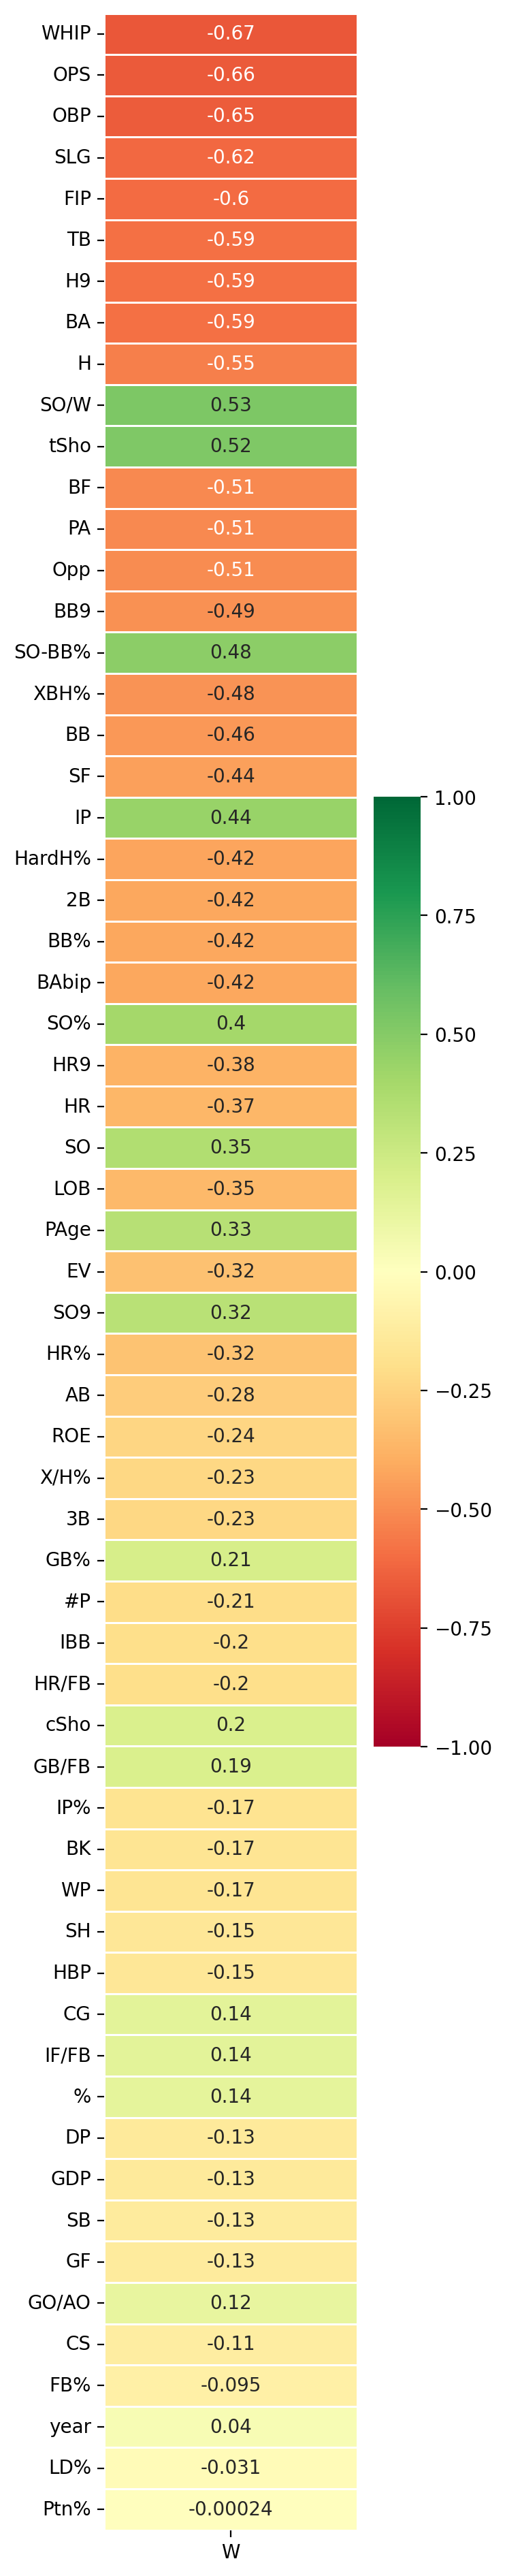

In [10]:
stats=['WHIP', 'OPS', 'OBP', 'SLG', 'FIP', 'TB', 'H9', 'BA', 'H', 'SO/W',
       'tSho', 'BF', 'PA', 'Opp', 'BB9', 'SO-BB%', 'XBH%', 'BB', 'SF', 'IP',
       'HardH%', '2B', 'BB%', 'BAbip', 'SO%', 'HR9', 'HR', 'SO', 'LOB', 'PAge',
       'EV', 'SO9', 'HR%', 'AB', 'ROE', 'X/H%', '3B', 'GB%', '#P', 'IBB',
       'HR/FB', 'cSho', 'GB/FB', 'IP%', 'BK', 'WP', 'SH', 'HBP', 'CG', 'IF/FB',
       '%', 'DP', 'GDP', 'SB', 'GF', 'GO/AO', 'CS', 'FB%', 'year', 'LD%', 'Ptn%']

plt.figure(figsize=(3,24))
sns.heatmap(tm_pitching_train.loc[:,stats+['W']].corr()['W'].to_frame().iloc[:-1,:],
        linewidths=.5, annot=True, cmap='RdYlGn',
        vmin=-1, vmax=1)
plt.show()

In [11]:
# # run to sort most correlated offensive stats
# abs(tm_batting_train.corr()['W']).sort_values(ascending=False).index

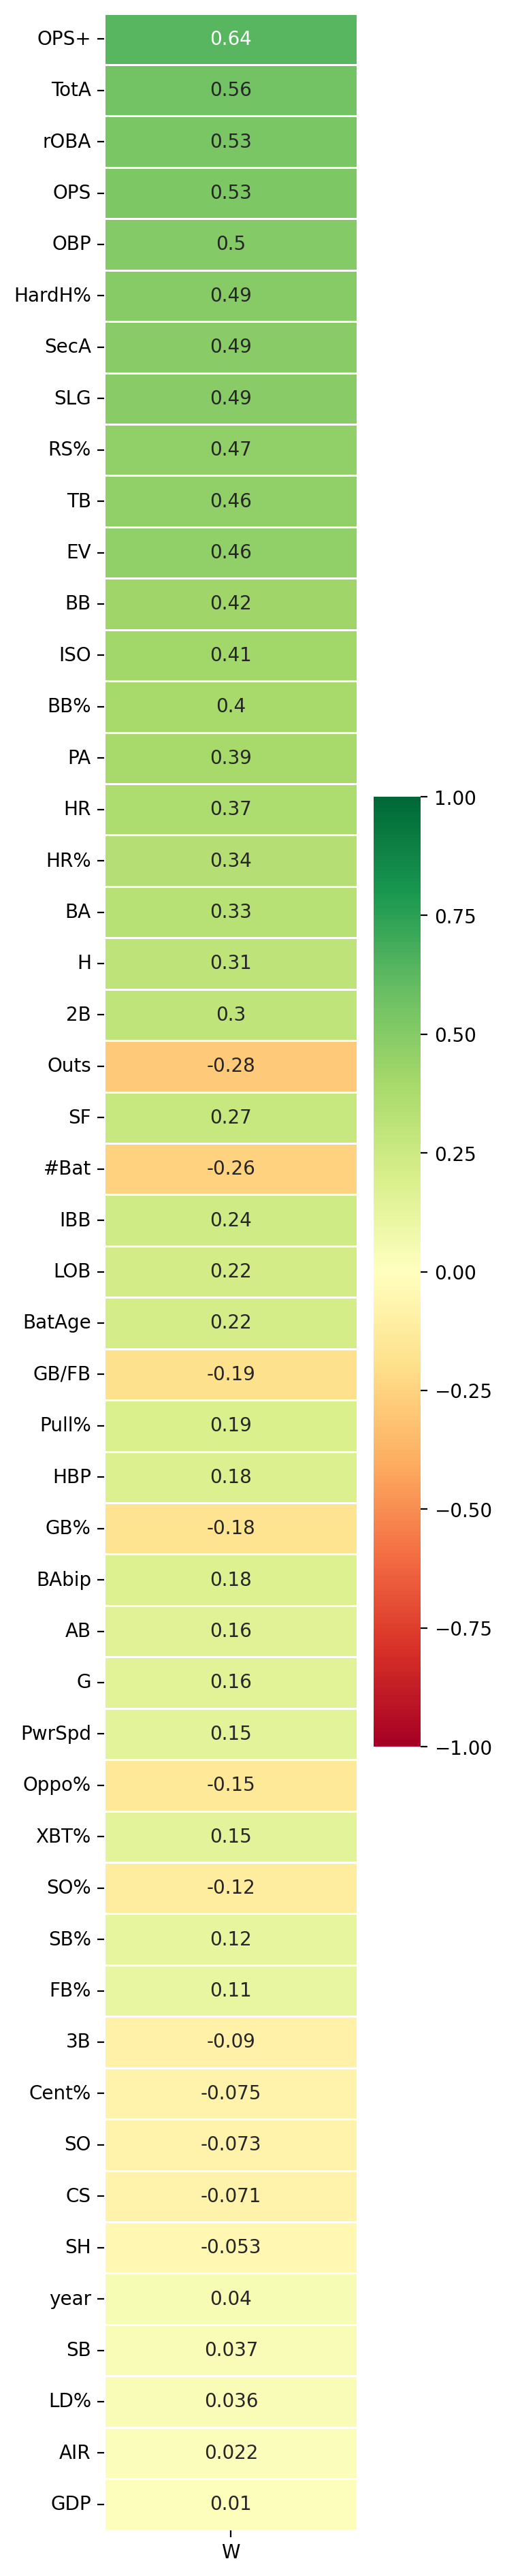

In [12]:
stats = ['OPS+', 'TotA', 'rOBA','OPS', 'OBP', 'HardH%', 'SecA', 'SLG', 'RS%', 
         'TB', 'EV', 'BB', 'ISO', 'BB%', 'PA', 'HR', 'HR%', 'BA', 'H', '2B',
         'Outs', 'SF', '#Bat', 'IBB', 'LOB', 'BatAge', 'GB/FB', 'Pull%', 'HBP', 
         'GB%', 'BAbip', 'AB', 'G', 'PwrSpd', 'Oppo%', 'XBT%', 'SO%', 'SB%', 'FB%',
         '3B', 'Cent%', 'SO', 'CS', 'SH', 'year', 'SB', 'LD%', 'AIR', 'GDP']

plt.figure(figsize=(3,24))
sns.heatmap(tm_batting_train.loc[:,stats+['W']].corr()['W'].to_frame().iloc[:-1,:],
        linewidths=.5, annot=True, cmap='RdYlGn',
        vmin=-1, vmax=1)
plt.show()

**Insights**

Pitching Insights:
- Stats that predict wins
    - `OPS(+), WHIP, FIP`
- Stats that don't predict wins well
    - baserunning (`SB`, `CS`), groundouts/airouts (`GO/AO`)

Offensive Insights:
- Stats that predict wins:
    - `OPS`, `TotA`, `rOBA`, hard hits (`HardH%`)
- Stats that don't predict wins:
    - strikeouts (`SO(%)`), `SB`, `Cent%`, triples (`3B`)
- `Pull%` slightly leads to more wins. As a predictor of wins, this relationship isn't as strong as other stats, like OPS 

Plot key stats for final notebook

In [13]:
def plot_key_corrs(df=tm_batting_train):
    fig, axes = plt.subplots(1, 2, figsize=(6, 6), gridspec_kw={'wspace': .4, 'width_ratios': [0.8, 1]})

    stats_pitching = ['WHIP', 'OPS', 'OBP', 'SLG', 'FIP', 'TB', 'H9', 'BA', 'H', 'SO/W',
       'BB9', 'BB', 'HardH%', '2B', 'BB%', 'SO%', 'HR9', 'HR', 'SO', 'PAge',
       'EV', 'SO9', 'GB%', 'GB/FB', 'SB', 'GO/AO', 'CS']

    sns.heatmap(tm_pitching_train.loc[:, stats_pitching+['W']].corr()['W'].to_frame().iloc[:-1,:],
                linewidths=.5, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=axes[0], cbar=False)

    axes[0].set_title('Pitching Stat Correlations' + ' '*10, pad=10)
    axes[0].tick_params(axis='both', which='both', bottom=False, left=False)
        
    stats_batting = ['OPS+', 'TotA', 'rOBA', 'OPS', 'OBP', 'HardH%', 'SecA', 'SLG', 'HR',
     'HR%', 'BA', 'H', '2B', 'BatAge', 'GB/FB', 'Pull%',
     'GB%', 'Oppo%', 'SO%', 'SB%', 'FB%', 'Cent%', 'SO', 'CS', 'SB', 'LD%']

    sns.heatmap(tm_batting_train.loc[:, stats_batting+['W']].corr()['W'].to_frame().iloc[:-1,:],
                linewidths=.5, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=axes[1])

    axes[1].set_title('Offensive Stat Correlations' + ' '*10, pad=10)
    axes[1].tick_params(axis='both', which='both', bottom=False, left=False)

    plt.show()

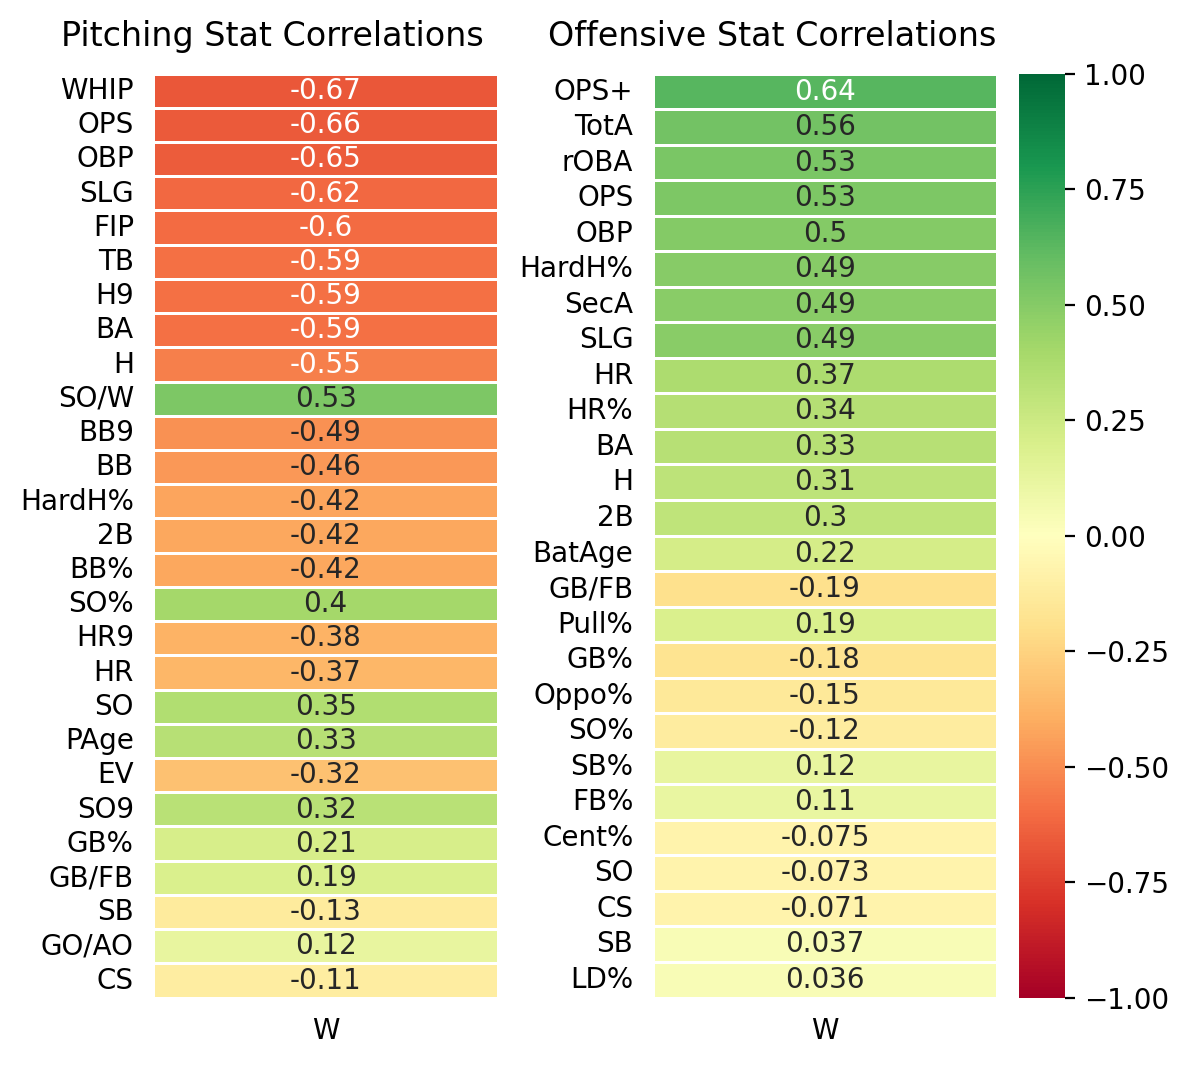

In [14]:
plot_key_corrs(df=tm_batting_train)

**1. Teams that pull the ball win more than those that don't.**

Correlations to Wins:
- $Pull\% = .19$
- $Cent\% = -.07$
- $Oppo\% = -.15$

Categorize wins to plot `Pull%`, `Cent%`, and `Oppo%` averages for teams with _ to _ wins

In [15]:
# Define the bin edges and labels
bins = [0, 60, 70, 80, 90, 100, float('inf')]
labels = ['60-', '60-69', '70-79', '80-89', '90-99', '100+']

# Create the 'W_bins' column
tm_batting_train['W_bins'] = pd.cut(tm_batting_train['W'], bins=bins, labels=labels, right=False)

Make function for final notebook

In [16]:
def bin_wins(df):
    # Define the bin edges and labels
    bins = [0, 60, 70, 80, 90, 100, float('inf')]
    labels = ['60-', '60-69', '70-79', '80-89', '90-99', '100+']

    # Create the 'W_bins' column
    df['W_bins'] = pd.cut(df['W'], bins=bins, labels=labels, right=False)
    return df

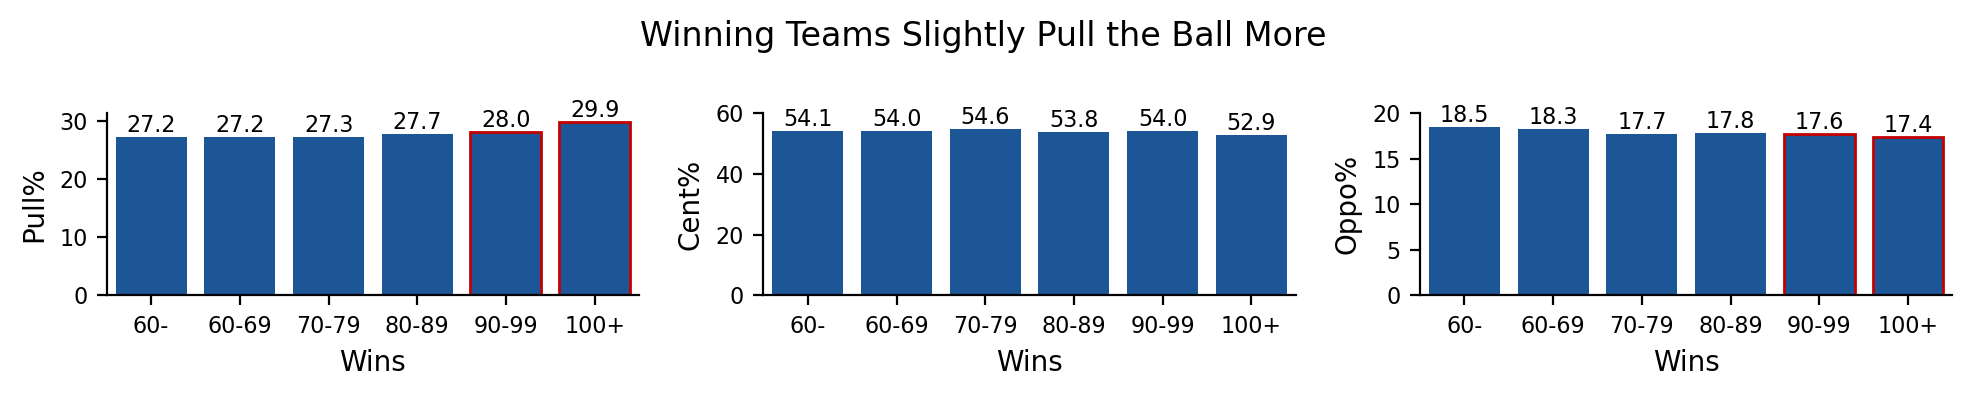

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))

sns.barplot(data=tm_batting_train, x='W_bins', y='Pull%', errorbar=None,
            order= sorted(tm_batting_train['W_bins'].unique())[1:] + ['100+'],
            palette=['#0955AA'], ax=axes[0], estimator='median')
for p in axes[0].patches:
    axes[0].annotate(f'{round(p.get_height(), 1)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
axes[0].set_xlabel('Wins')
axes[0].set_yticks(np.arange(0,31,10), np.arange(0,31,10))

sns.barplot(data=tm_batting_train, x='W_bins', y='Cent%', errorbar=None,
            order= sorted(tm_batting_train['W_bins'].unique())[1:] + ['100+'],
            palette=['#0955AA'], ax=axes[1], estimator='median')
for p in axes[1].patches:
    axes[1].annotate(f'{round(p.get_height(), 1)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
axes[1].set_xlabel('Wins')
axes[1].set_yticks(np.arange(0,61,20), np.arange(0,61,20))


sns.barplot(data=tm_batting_train, x='W_bins', y='Oppo%', errorbar=None,
            order= sorted(tm_batting_train['W_bins'].unique())[1:] + ['100+'],
            palette=['#0955AA'], ax=axes[2], estimator='median')
for p in axes[2].patches:
    axes[2].annotate(f'{round(p.get_height(), 1)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
axes[2].set_xlabel('Wins')
axes[2].set_yticks(np.arange(0, 21,5), np.arange(0, 21,5))

axes[0].patches[-2].set_edgecolor('#C40000')
axes[0].patches[-1].set_edgecolor('#C40000')
axes[2].patches[-2].set_edgecolor('#C40000')
axes[2].patches[-1].set_edgecolor('#C40000')

plt.suptitle('Winning Teams Slightly Pull the Ball More')
plt.tight_layout()
sns.despine()

for ax in axes:
    ax.tick_params(axis='both', labelsize=8)

Make function for final notebook

In [44]:
def plot_percent_medians(df):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))

    
    sns.barplot(data=df, x='W_bins', y='Pull%', errorbar=None,
                order= sorted(df['W_bins'].unique())[1:] + ['100+'],
                palette=['#0955AA'], ax=axes[0], estimator='median')
    axes[0].set_yticks(np.arange(0,31,10))

    
    sns.barplot(data=df, x='W_bins', y='Cent%', errorbar=None,
                order= sorted(df['W_bins'].unique())[1:] + ['100+'],
                palette=['#0955AA'], ax=axes[1], estimator='median')
    axes[1].set_yticks(np.arange(0,61,20))


    sns.barplot(data=df, x='W_bins', y='Oppo%', errorbar=None,
                order= sorted(df['W_bins'].unique())[1:] + ['100+'],
                palette=['#0955AA'], ax=axes[2], estimator='median')

    axes[2].set_yticks(np.arange(0, 21,5))

    axes[0].patches[-2].set_edgecolor('#C40000')
    axes[0].patches[-1].set_edgecolor('#C40000')
    axes[2].patches[-2].set_edgecolor('#C40000')
    axes[2].patches[-1].set_edgecolor('#C40000')

    plt.suptitle('Median Pull/Center/Oppo Percentages')
    plt.tight_layout()
    sns.despine()
    
    for ax in axes:
        # make ticks smaller
        ax.tick_params(axis='both', labelsize=8)
        for p in ax.patches:
            # change x labels
            ax.set_xlabel('Wins')
            # annotate bars
            ax.annotate(f'{round(p.get_height(), 1)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom',  fontsize=8)
    
    plt.show()

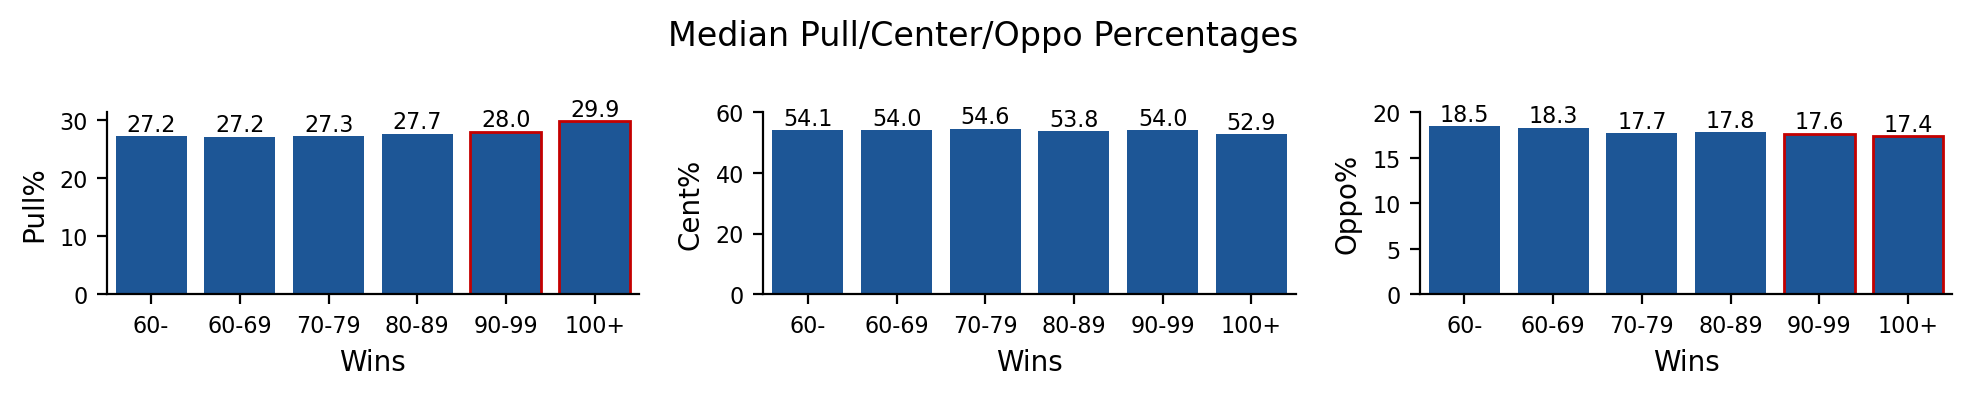

In [45]:
plot_percent_medians(tm_batting_train)

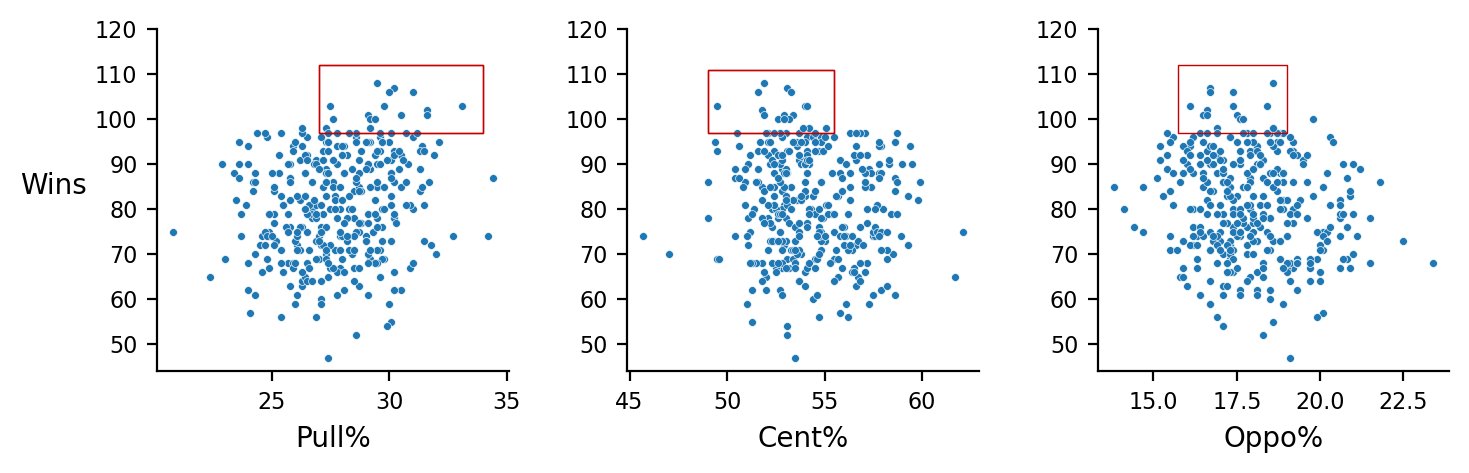

In [38]:
# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7.5, 2.5))

# Scatterplot 1
sns.scatterplot(data=tm_batting_train, x='Pull%', y='W', s=8, ax=axes[0])
axes[0].set_xlabel('Pull%')
axes[0].set_yticks(ticks=np.arange(50, 121, 10))
axes[0].set_ylabel('Wins', rotation=0, labelpad=15)

rectangle = patches.Rectangle((27, 97), 7, 15, linewidth=.5,
                              edgecolor='#C40000', facecolor='none')
axes[0].add_patch(rectangle)
axes[0].add_patch(rectangle)


# Scatterplot 2
sns.scatterplot(data=tm_batting_train, x='Cent%', y='W', s=8, ax=axes[1])
axes[1].set_xlabel('Cent%')
axes[1].set_yticks(ticks=np.arange(50, 121, 10))
axes[1].set_ylabel('')
rectangle = patches.Rectangle((49, 97), 6.5, 14, linewidth=.5,
                              edgecolor='#C40000', facecolor='none')
axes[1].add_patch(rectangle)
axes[1].add_patch(rectangle)


# Scatterplot 3
sns.scatterplot(data=tm_batting_train, x='Oppo%', y='W', s=8, ax=axes[2])
axes[2].set_xlabel('Oppo%')
axes[2].set_yticks(ticks=np.arange(50, 121, 10))
axes[2].set_ylabel('')
rectangle = patches.Rectangle((15.75, 97), 3.25, 15, linewidth=.5,
                              edgecolor='#C40000', facecolor='none')
axes[2].add_patch(rectangle)

# Adjust the spacing between subplots
plt.tight_layout()
sns.despine()

for ax in axes:
    # make ticks smaller
    ax.tick_params(axis='both', labelsize=8)

# Show the plot
plt.show()

Make function for final notebook

In [21]:
def plot_wins_vs_percentages(df):
    # Create the subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7.5, 2.5))

    # Scatterplot 1
    sns.scatterplot(data=tm_batting_train, x='Pull%', y='W', s=8, ax=axes[0])
    axes[0].set_xlabel('Pull%')
    axes[0].set_yticks(ticks=np.arange(50, 121, 10))
    axes[0].set_ylabel('Wins', rotation=0, labelpad=15)

    rectangle = patches.Rectangle((27, 97), 7, 15, linewidth=.5,
                                  edgecolor='#C40000', facecolor='none')
    axes[0].add_patch(rectangle)
    axes[0].add_patch(rectangle)


    # Scatterplot 2
    sns.scatterplot(data=tm_batting_train, x='Cent%', y='W', s=8, ax=axes[1])
    axes[1].set_xlabel('Cent%')
    axes[1].set_yticks(ticks=np.arange(50, 121, 10))
    axes[1].set_ylabel('')
    rectangle = patches.Rectangle((49, 97), 6.5, 14, linewidth=.5,
                                  edgecolor='#C40000', facecolor='none')
    axes[1].add_patch(rectangle)
    axes[1].add_patch(rectangle)


    # Scatterplot 3
    sns.scatterplot(data=tm_batting_train, x='Oppo%', y='W', s=8, ax=axes[2])
    axes[2].set_xlabel('Oppo%')
    axes[2].set_yticks(ticks=np.arange(50, 121, 10))
    axes[2].set_ylabel('')
    rectangle = patches.Rectangle((15.75, 97), 3.25, 15, linewidth=.5,
                                  edgecolor='#C40000', facecolor='none')
    axes[2].add_patch(rectangle)

    # Adjust the spacing between subplots
    plt.suptitle('Winning Teams Slightly Pull the Ball More')
    plt.tight_layout()
    sns.despine()

    for ax in axes:
        # make ticks smaller
        ax.tick_params(axis='both', labelsize=8)

    # Show the plot
    plt.show()

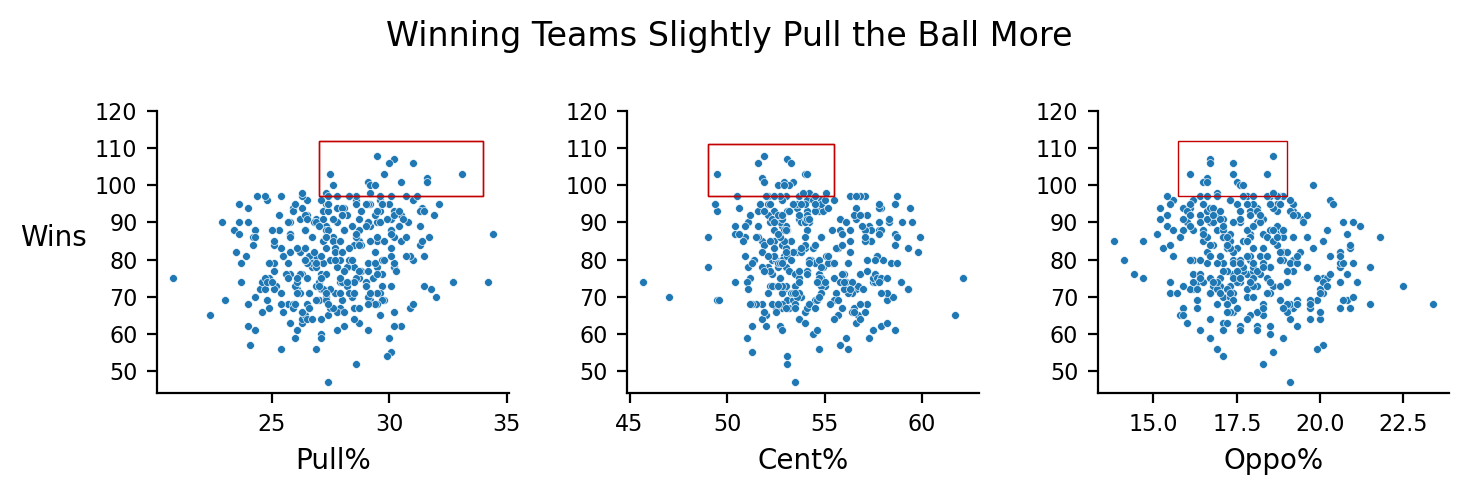

In [22]:
plot_wins_vs_percentages(tm_batting_train)

Could run an ANOVA or T-test to see if there is a significant difference in Pull%, Cent%, Oppo% between losing and winning teams.

- For ANOVA, use multiple bins.
- For T-tests, compare averages for teams with winning records and losing records

Could also run correlation test to test correlations of Wins and any of these percentage stats.

**2. OPS/OPS+ lead to more wins**

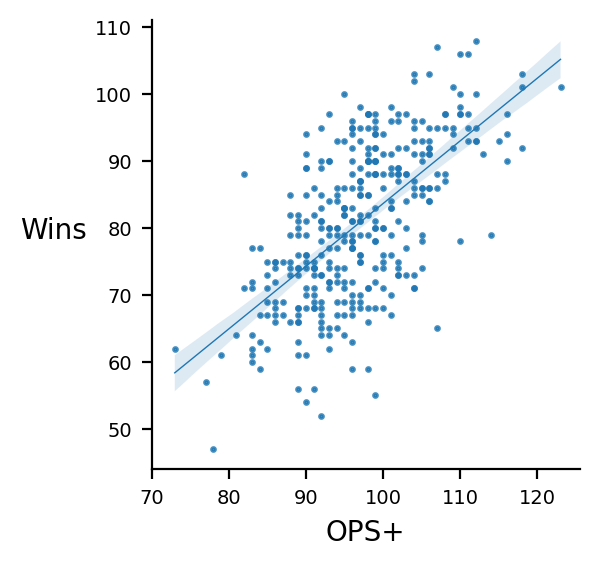

In [46]:
sns.lmplot(data=tm_batting_train, x='OPS+', y='W', height=3,
           scatter_kws={'s': 2},
           line_kws={'linewidth': .5})

plt.xticks(ticks=np.arange(70, 121, 10), fontsize=8)
plt.xlabel('OPS+')
plt.yticks(ticks=np.arange(50, 111, 10), fontsize=8)
plt.ylabel('Wins', rotation=0, labelpad=15)

plt.tick_params(axis='both', labelsize=7)

sns.despine()
plt.show()

Make function for final notebook

In [24]:
def plot_W_by_OPS(df):
    sns.lmplot(data=df, x='OPS+', y='W', height=3,
               scatter_kws={'s': 2},
               line_kws={'linewidth': .5})

    plt.xticks(ticks=np.arange(70, 121, 10), fontsize=8)
    plt.xlabel('OPS+')
    plt.yticks(ticks=np.arange(50, 111, 10), fontsize=8)
    plt.ylabel('Wins', rotation=0, labelpad=15)


    plt.title('OPS+ leads to more wins', fontsize=10)

    plt.tick_params(axis='both', labelsize=7)

    sns.despine()
    plt.show()

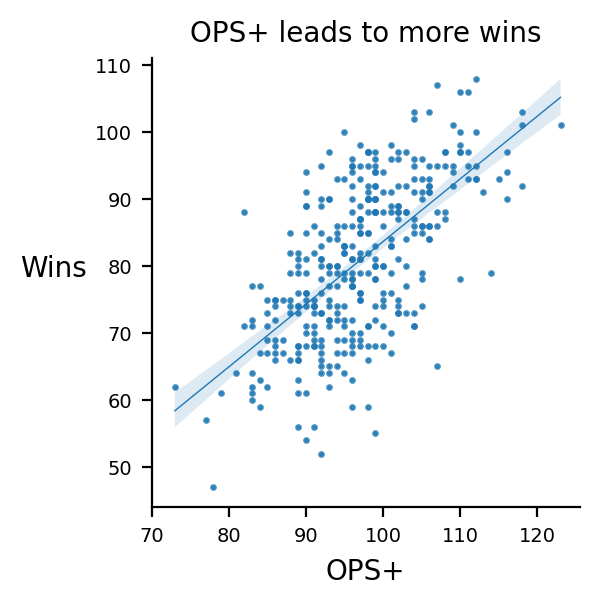

In [25]:
plot_W_by_OPS(tm_batting_train)

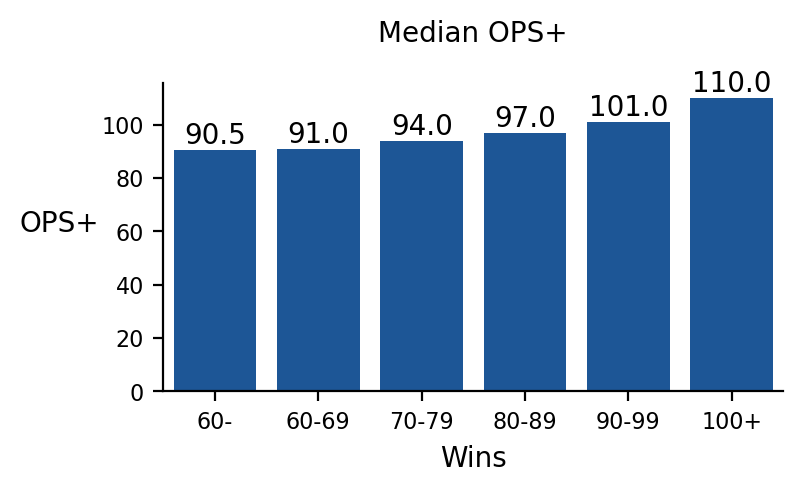

In [26]:
plt.figure(figsize=(4, 2))

sns.barplot(data=tm_batting_train, x='W_bins', y='OPS+', errorbar=None,
            order= sorted(tm_batting_train['W_bins'].unique())[1:] + ['100+'],
            palette=['#0955AA'], estimator='median')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 1)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

plt.ylabel('OPS+', rotation=0, labelpad=15)
plt.xlabel('Wins')
plt.tick_params(axis='both', labelsize=8)

plt.title('Median OPS+', fontsize=10, pad=15)
sns.despine()
plt.show()

In [27]:
tm_batting_train.groupby('W_bins')['OPS+'].median()

W_bins
60-       90.5
60-69     91.0
70-79     94.0
80-89     97.0
90-99    101.0
100+     110.0
Name: OPS+, dtype: float64

Make function for final notebook

In [28]:
def plot_median_OPS(df):
    plt.figure(figsize=(4, 2))

    sns.barplot(data=df, x='W_bins', y='OPS+', errorbar=None,
                order= sorted(df['W_bins'].unique())[1:] + ['100+'],
                palette=['#0955AA'], estimator='median')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height(), 1)}', (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='bottom')

    plt.ylabel('OPS+', rotation=0, labelpad=15)
    plt.xlabel('Wins')
    plt.tick_params(axis='both', labelsize=8)

    plt.title('Median OPS+', fontsize=10, pad=15)
    sns.despine()
    plt.show()

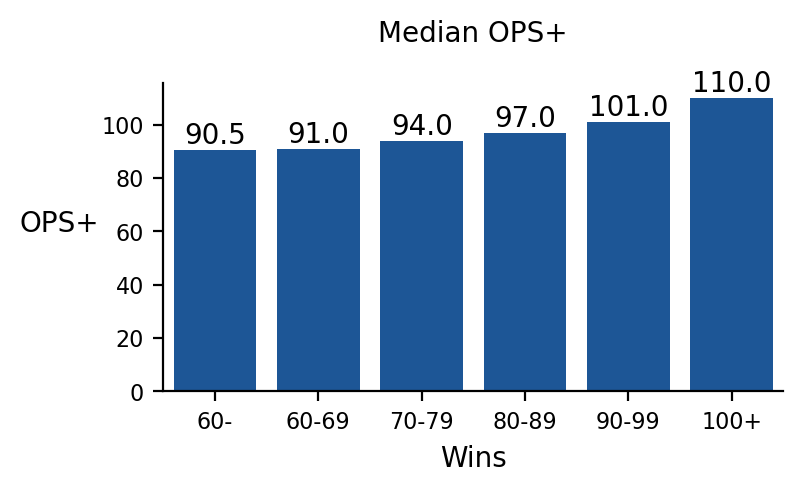

In [29]:
plot_median_OPS(tm_batting_train)

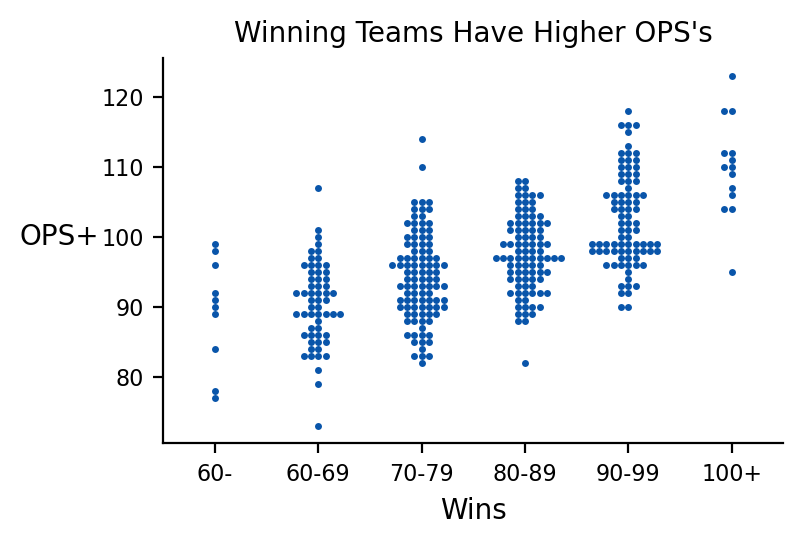

In [30]:
plt.figure(figsize=(4, 2.5))

sns.swarmplot(data=tm_batting_train, x='W_bins', y='OPS+',
              order= sorted(tm_batting_train['W_bins'].unique())[1:] + ['100+'],
              size=2.5, color='#0955AA', legend=False)

plt.xlabel('Wins')
plt.ylabel('OPS+', rotation=0, labelpad=15)
plt.tick_params(axis='both', labelsize=8)

plt.title('Winning Teams Have Higher OPS\'s', fontsize=10)
sns.despine()
plt.show()

Make function for final notebook

In [47]:
def plot_OPS_distributions(df):
    plt.figure(figsize=(4, 2.5))

    sns.swarmplot(data=df, x='W_bins', y='OPS+',
                  order= sorted(df['W_bins'].unique())[1:] + ['100+'],
                  size=2.5, color='#0955AA', legend=False)

    plt.xlabel('Wins')
    plt.ylabel('OPS+', rotation=0, labelpad=15)
    plt.tick_params(axis='both', labelsize=8)

    sns.despine()
    plt.show()

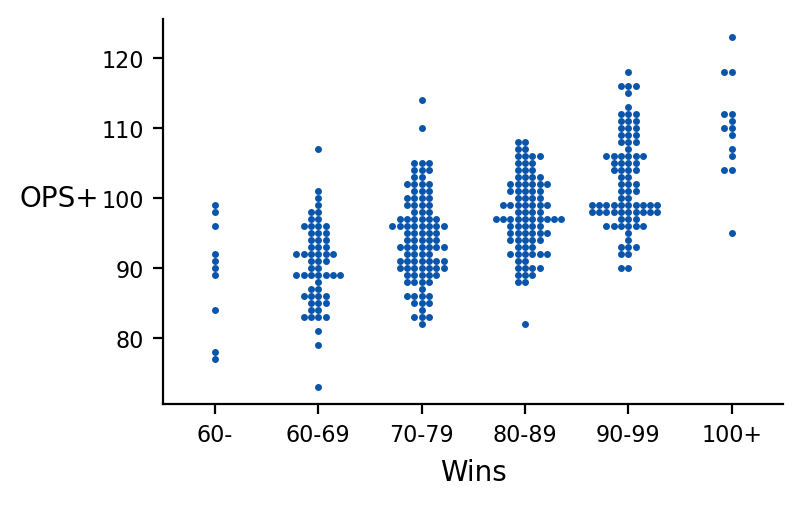

In [48]:
plot_OPS_distributions(tm_batting_train)

Could run an ANOVA or T-test to see if there is a significant difference in OPS+ between losing and winning teams.

- For ANOVA, use multiple bins.
- For T-tests, compare averages for teams with winning records and losing records

Could also run correlation test to test correlations of Wins and OPS+.

Exploration Summary:
- Key Insights:
    - `OPS` (offensively and pitching), `rOBA`, and `WHIP` are some of the strongest drivers of wins
    - Total Average (`TotA`) and Secondary Average (`SecA`) drive wins more than (regular) Batting Average (`BA`)
    - Pulled balls (`Pull%`) drive more wins than non-pulled hits (`Cent%` and `Oppo%`)
    
Conclusions:
- Winning teams slightly pull the ball more.
- Common stats like average (`BA`), hits (`H`), and home runs (`HR`) don't predict wins as much as advanced/sabermetric stats. However. these stats are likely to be the "poster stats" due to tradition and simplicity. 
- Although there is a sort of fascination and praise from the media for hitters that are able to spread the ball, more analysis should be done to see how valuable this skill really is (compared to others).


Further exploration ideas:
- Gather fielding data and find strong correlations to win
- See how relationships are changing over the years
    - Which stats drive wins from 2005-2009? 2010-2014? 2015-2019?
- Since OPS is a major predictor of Wins, I would want to see which offensive stats drive OPS the most and which pitching stats reduce OPS against.
- Since batter and pitcher age have a slight positive correlation to wins, I could analyze stats on age, perhaps looking into player peaks.


For modeling, find strong predictors that are independent of each other:

Offensive
- OPS+, HardH%, HR, BatAge

Pitching
- OPS, BB, HardH%, PAge
- WHIP, HardH%, HR, PAge

I also verified (at the end of the page) that offensive and pitching stats are independent.

Features to model on:
- `['OPS+_b', 'HR_b', 'BatAge_b', 'OPS_p', 'BB_p', 'PAge_p']`
- `['OPS+_b', 'HR_b', 'BatAge_b', 'WHIP_p', 'HR_p', 'PAge_p']`

Using these correlations graphs to evaluate feature independence

<Axes: >

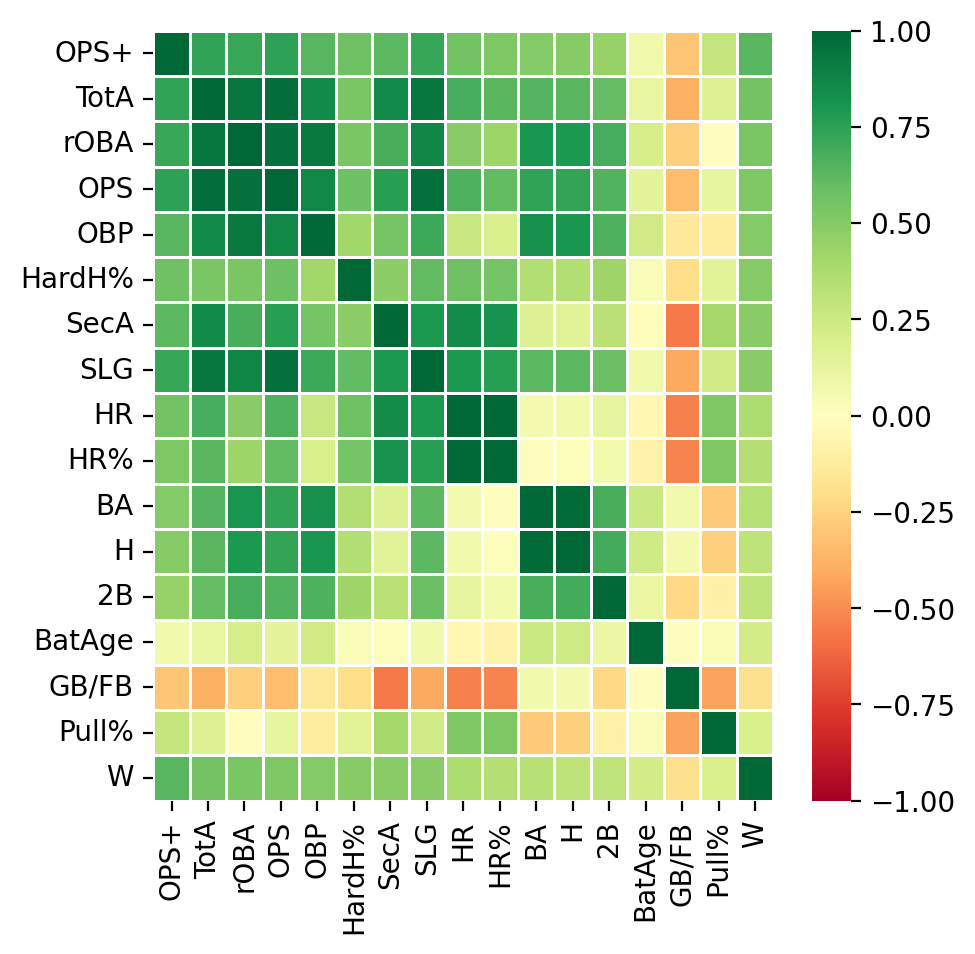

In [33]:
plt.figure(figsize=(5,5))
stats_batting = ['OPS+', 'TotA', 'rOBA', 'OPS', 'OBP', 'HardH%', 'SecA', 'SLG', 'HR',
                 'HR%', 'BA', 'H', '2B', 'BatAge', 'GB/FB', 'Pull%']

sns.heatmap(tm_batting_train[stats_batting+['W']].corr(),
            linewidths=.5, cmap='RdYlGn',
            vmin=-1, vmax=1)

In [34]:
tm_batting_train[stats_batting+['W']].corr()

,OPS+,TotA,rOBA,OPS,OBP,HardH%,SecA,SLG,HR,HR%,BA,H,2B,BatAge,GB/FB,Pull%,W
OPS+,1.000000,0.739120,0.713935,0.744766,0.640238,0.565335,0.617669,0.720786,0.561443,0.526496,0.500114,0.497927,0.452874,0.075540,-0.308005,0.274397,0.636666
TotA,0.739120,1.000000,0.941351,0.975431,0.857656,0.536232,0.854304,0.934614,0.682116,0.630671,0.646439,0.630899,0.597400,0.117148,-0.389900,0.168167,0.556596
rOBA,0.713935,0.941351,1.000000,0.957214,0.928744,0.538236,0.673346,0.872082,0.488201,0.428585,0.809081,0.791818,0.683868,0.209233,-0.264489,-0.001037,0.533288
OPS,0.744766,0.975431,0.957214,1.000000,0.865398,0.575238,0.763385,0.965399,0.659987,0.608667,0.741789,0.729625,0.650428,0.137278,-0.340547,0.119886,0.529486
OBP,0.640238,0.857656,0.928744,0.865398,1.000000,0.406608,0.551653,0.705143,0.266802,0.198872,0.826916,0.797547,0.658231,0.230400,-0.143251,-0.117295,0.502162
HardH%,0.565335,0.536232,0.538236,0.575238,0.406608,1.000000,0.478074,0.607813,0.566665,0.550743,0.346316,0.350149,0.420484,0.037391,-0.198272,0.151872,0.492758
SecA,0.617669,0.854304,0.673346,0.763385,0.551653,0.478074,1.000000,0.793796,0.846962,0.818677,0.164634,0.154524,0.322155,-0.009639,-0.555535,0.399604,0.488200
SLG,0.720786,0.934614,0.872082,0.965399,0.705143,0.607813,0.793796,1.000000,0.795776,0.758476,0.619758,0.617793,0.578379,0.074326,-0.408622,0.230340,0.487421
HR,0.561443,0.682116,0.488201,0.659987,0.266802,0.566665,0.846962,0.795776,1.000000,0.995260,0.055392,0.070442,0.122663,-0.052199,-0.536798,0.516007,0.373181
HR%,0.526496,0.630671,0.428585,0.608667,0.198872,0.550743,0.818677,0.758476,0.995260,1.000000,-0.000313,0.009644,0.067335,-0.070422,-0.530650,0.528417,0.341639


<Axes: >

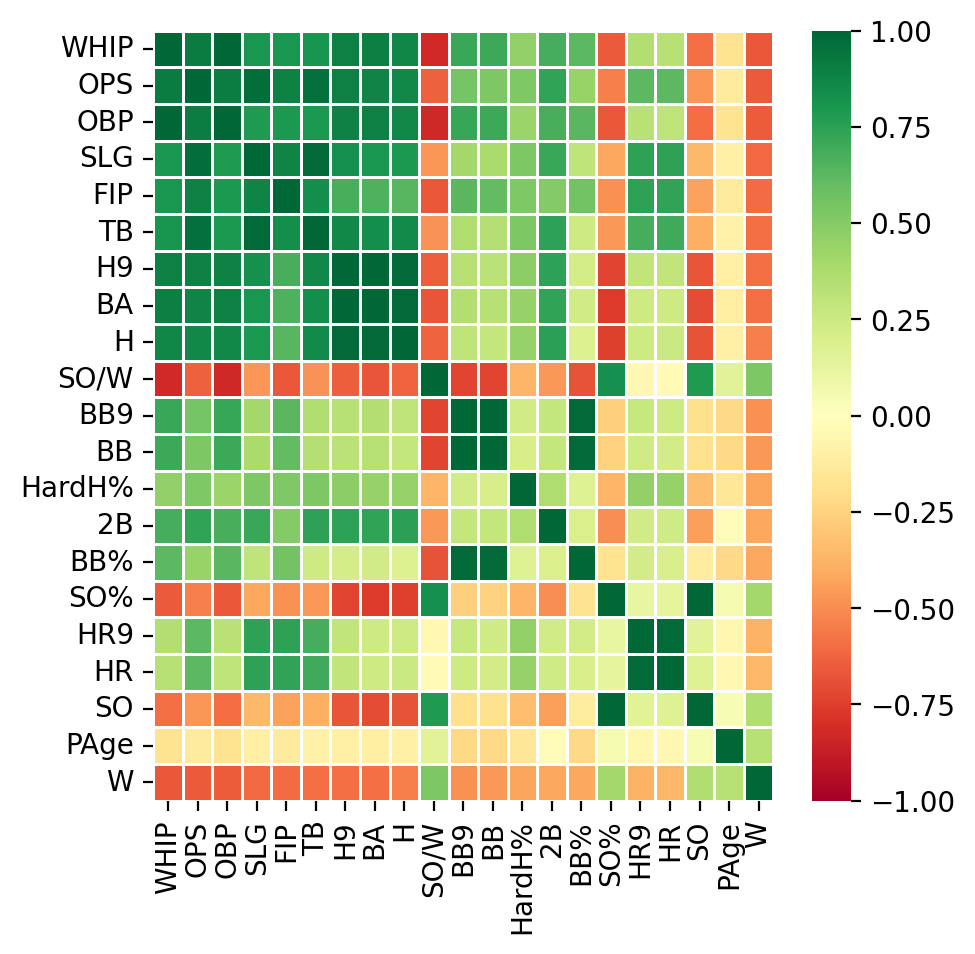

In [35]:
plt.figure(figsize=(5,5))

stats_pitching = ['WHIP', 'OPS', 'OBP', 'SLG', 'FIP', 'TB', 'H9', 'BA', 'H', 'SO/W',
                   'BB9', 'BB', 'HardH%', '2B', 'BB%', 'SO%', 'HR9', 'HR', 'SO', 'PAge']
sns.heatmap(tm_pitching_train[stats_pitching+['W']].corr(),
            linewidths=.5, cmap='RdYlGn',
            vmin=-1, vmax=1)

In [36]:
tm_pitching_train[stats_pitching+['W']].corr()

,WHIP,OPS,OBP,SLG,FIP,TB,H9,BA,H,SO/W,...,BB,HardH%,2B,BB%,SO%,HR9,HR,SO,PAge,W
WHIP,1.000000,0.919336,0.994303,0.801789,0.797454,0.810214,0.895090,0.898653,0.869520,-0.821207,...,0.703434,0.463624,0.684823,0.622919,-0.660307,0.346106,0.335252,-0.588248,-0.178948,-0.665415
OPS,0.919336,1.000000,0.910470,0.970921,0.890267,0.964501,0.893318,0.880037,0.861734,-0.640320,...,0.526067,0.516930,0.735792,0.444506,-0.539069,0.620574,0.620492,-0.470439,-0.131182,-0.663845
OBP,0.994303,0.910470,1.000000,0.785262,0.789474,0.790951,0.883542,0.894457,0.860458,-0.835199,...,0.710152,0.433517,0.674070,0.631213,-0.670786,0.321652,0.310337,-0.599509,-0.176468,-0.654345
SLG,0.801789,0.970921,0.785262,1.000000,0.876603,0.986996,0.826943,0.800644,0.792899,-0.475549,...,0.377058,0.530886,0.712128,0.300527,-0.419072,0.743355,0.749849,-0.357542,-0.094808,-0.615633
FIP,0.797454,0.890267,0.789474,0.876603,1.000000,0.841692,0.676416,0.659976,0.634248,-0.666277,...,0.606138,0.517159,0.505273,0.554865,-0.488300,0.744974,0.739275,-0.433689,-0.128628,-0.603515
TB,0.810214,0.964501,0.790951,0.986996,0.841692,1.000000,0.867133,0.840084,0.852756,-0.477871,...,0.340547,0.530182,0.749139,0.247999,-0.463772,0.683945,0.696486,-0.395131,-0.087283,-0.592054
H9,0.895090,0.893318,0.883542,0.826943,0.676416,0.867133,1.000000,0.993666,0.987665,-0.642306,...,0.316186,0.478576,0.746543,0.211535,-0.728046,0.296059,0.295011,-0.673944,-0.099331,-0.587723
BA,0.898653,0.880037,0.894457,0.800644,0.659976,0.840084,0.993666,1.000000,0.987875,-0.677531,...,0.332774,0.452693,0.735337,0.229223,-0.762415,0.244698,0.243146,-0.709886,-0.108883,-0.586320
H,0.869520,0.861734,0.860458,0.792899,0.634248,0.852756,0.987665,0.987875,1.000000,-0.632282,...,0.288743,0.450756,0.752174,0.173907,-0.742343,0.243492,0.250011,-0.682116,-0.094794,-0.546734
SO/W,-0.821207,-0.640320,-0.835199,-0.475549,-0.666277,-0.477871,-0.642306,-0.677531,-0.632282,1.000000,...,-0.733046,-0.370406,-0.465254,-0.684623,0.827252,-0.052917,-0.031540,0.787242,0.154914,0.527326


In [37]:
pd.merge(left = tm_batting_train, right = tm_pitching_train, on=['year', 'Tm'], 
         suffixes= ("_bat", "_pit")).corr()['OPS+']

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_18939/467805309.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  suffixes= ("_bat", "_pit")).corr()['OPS+']


year        0.075560
W_bat       0.636666
L_bat      -0.635719
W-L%_bat    0.636160
#Bat       -0.064452
              ...   
HR/FB       0.055591
IF/FB       0.182731
Opp        -0.190207
DP         -0.088336
%           0.011141
Name: OPS+, Length: 142, dtype: float64